In [1]:
import sys
%matplotlib inline
sys.path.append("/usr/gapps/spot/dev/hatchet-venv/x86_64/lib/python3.9/site-packages/") # <-- Python packages
sys.path.append("/usr/gapps/spot/dev/hatchet/x86_64/") # <-- Hatchet
sys.path.append("/g/g91/nansamba1/thicket/") # <-- Thicket

from glob import glob

import pandas as pd

import thicket as th
import hatchet as ht

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [2]:
ht
th
th.__version__

'2024.2.1'

In [3]:
print(ht.__version__)
print(th.__version__)

2024.1.1
2024.2.1


# Read in Data

In [4]:
import glob
#Read in Kripke data
#kripke_files = "/usr/workspace/nansamba1/workspace_grace_ruby_10_4_24/kripke/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/kripke/kripke"
kripke_files = "/usr/workspace/nansamba1/workspace_grace_dane_12-5-24/kripke/openmp/LLNL-Dane-DELL-sapphirerapids-OmniPath/workspace/experiments/kripke/kripke"
#kripke_files = "/usr/workspace/nansamba1/workspace_grace_11-16-24/kripke/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/kripke/kripke"
kripke_cali_files = glob.glob(f"{kripke_files}/**/*.cali", recursive=True)
kripke_strong_scaling = [file for file in kripke_cali_files if 'strong' in  file]
kripke_weak_scaling = [file for file in kripke_cali_files if 'weak' in file]
tk_kripke = th.Thicket.from_caliperreader(kripke_strong_scaling, string_attributes="loop")
tk_kripke_weak = th.Thicket.from_caliperreader(kripke_weak_scaling, string_attributes="loop")

#Read in amg2023
#amg2023_files = "/usr/workspace/nansamba1/workspace_grace_ruby_10-31-24_grid/amg2023/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/amg2023/problem1"
amg2023_files = "/usr/workspace/nansamba1/workspace_grace_dane_12-5-24/amg2023/openmp/LLNL-Dane-DELL-sapphirerapids-OmniPath/workspace/experiments/amg2023/problem1"
#bigger number of processes
#amg2023_files = "/usr/workspace/nansamba1/workspace_grace_ruby_11-17-24/amg2023/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/amg2023/problem1"
amg2023_files = glob.glob(f"{amg2023_files}/**/*.cali", recursive=True)
amg2023_strong_scaling = [file for file in amg2023_files if 'strong' in file]
amg2023_weak_scaling = [file for file in amg2023_files if 'weak' in file]
#amg2023_weak_s_scaling = [file for file in amg2023_files if 'weak_s' in file]

tk_amg2023 = th.Thicket.from_caliperreader(amg2023_strong_scaling, string_attributes="loop", fill_perfdata=False)
#tk_amg2023 = th.Thicket.from_caliperreader(amg2023_strong_scaling_120, string_attributes="loop", fill_perfdata=False)
tk_amg2023_weak = th.Thicket.from_caliperreader(amg2023_weak_scaling, string_attributes="loop", fill_perfdata=False)
#tk_amg2023_weak_s = th.Thicket.from_caliperreader(amg2023_weak_s_scaling, string_attributes="loop", fill_perfdata=False)

(2/2) Creating Thicket: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


In [ ]:
available_columns = tk_amg2023_weak.show_metric_columns()
print(available_columns)

# Filter data 

In [5]:
#filter data by loop 
query = th.query.Query().match(
    ".",
    lambda row: row["name"].apply(
        lambda n: "hypre_BoomerAMGSolve" in n
    ).all()
).rel("*")
filtered_tk_amg = tk_amg2023.query(query)
filtered_tk_amg_weak = tk_amg2023_weak.query(query)

In [79]:
#filter data by loop 
import re
query = th.query.Query().match(
    ".",
    lambda row: row["name"].apply(
      lambda x: re.match( "halo_exchange", x ) is not None
    ).all()
)
filtered_tk_amg_test_halo = filtered_tk_amg.query(query)
filtered_tk_amg_weak_test_halo = filtered_tk_amg_weak.query(query)

In [80]:
print(filtered_tk_amg_weak_test_halo.tree(metric_column="Max time/rank (inc)"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.2.1

0.102 halo_exchange

Legend (Metric: Max time/rank (inc) Min: 0.10 Max: 0.10 indices: {'profile': 384601513})
█ 0.10 - 0.10
█ 0.10 - 0.10
█ 0.10 - 0.10
█ 0.10 - 0.10
█ 0.10 - 0.10
█ 0.10 - 0.10

name User code    ◀  Only in left graph    ▶  Only in right graph



In [ ]:
# filter by halo_excahnge
query="""
    MATCH (".")->(".",p)
    WHERE p."name" = "halo_exchange"
    """
#filtered_tk_kripke = tk_kripke.query(query, multi_index_mode="all")
#filtered_tk_kripke_weak = tk_kripke_weak.query(query, multi_index_mode="all")

filtered_tk_amg_halo_test = filtered_tk_amg.query(query, multi_index_mode="all")
filtered_tk_amg_halo_weak_test = filtered_tk_amg_weak.query(query, multi_index_mode="all")

In [64]:
#filtered_tk_amg_weak_test_halo.dataframe

In [78]:
print(filtered_tk_amg_halo_weak_test.tree(metric_column="Max time/rank (inc)"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.2.1

1.091 hypre_BoomerAMGSolve
└─ 0.910 main_loop
   └─ 0.730 hypre_BoomerAMGCycle
      ├─ 0.109 MG level 0
      │  ├─ 0.031 Relaxation
      │  │  └─ 0.005 halo_exchange
      │  ├─ 0.021 Residual
      │  │  └─ 0.011 hypre_ParCSRMatrixMatvecOutOfPlaceHost
      │  │     └─ 0.002 halo_exchange
      │  └─ 0.016 Restriction
      │     └─ 0.010 hypre_ParCSRMatrixMatvecTHost
      │        └─ 0.005 halo_exchange
      ├─ 0.150 MG level 1
      │  ├─ 0.010 Interpolation
      │  │  └─ 0.006 hypre_ParCSRMatrixMatvecOutOfPlaceHost
      │  │     └─ 0.002 halo_exchange
      │  ├─ 0.039 Relaxation
      │  │  └─ 0.008 halo_exchange
      │  ├─ 0.024 Residual
      │  │  └─ 0.013 hypre_ParCSRMatrixMatvecOutOfPlaceHost
      │  │     └─ 0.002 halo_exchange
      │  └─ 0.022 Restriction
      │     └─ 0.014 hypr

In [6]:
#filter data by loop 
query = th.query.Query().match(
    ".",
    lambda row: row["name"].apply(
        lambda n: "solve" in n
    ).all()
).rel("*")
filtered_tk_kripke = tk_kripke.query(query)
filtered_tk_kripke_weak = tk_kripke_weak.query(query)

In [7]:
tk_kripke.metadata_columns_to_perfdata("mpi.world.size")
tk_amg2023.metadata_columns_to_perfdata("mpi.world.size")
tk_kripke_weak.metadata_columns_to_perfdata("mpi.world.size")
tk_amg2023_weak.metadata_columns_to_perfdata("mpi.world.size")

In [ ]:
tk_kripke.update_inclusive_columns()
tk_kripke_weak.update_inclusive_columns()
tk_amg2023.update_inclusive_columns()
tk_amg2023_weak.update_inclusive_columns()

# calculation for Average time per loop 

In [27]:
filtered_tk_kripke.dataframe["Total Loops"] = filtered_tk_kripke.dataframe["Calls/rank (avg)"] -1
#print(filtered_tk_kripke.dataframe[filtered_tk_kripke.get_node("solve")])

#print(filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve"), "Total Loops"])
main_loops = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve"), "Total Loops"]
for index, value in main_loops.items():
    for df_index, df_value in filtered_tk_kripke.dataframe.iterrows():
        filtered_tk_kripke.dataframe.loc[df_index, "Total_main_loops"] = value
#print(filtered_tk_kripke.dataframe["Total_main_loops"])
filtered_tk_kripke.dataframe["Avg Time Per Loop"] = filtered_tk_kripke.dataframe["Max time/rank (inc)"] / filtered_tk_kripke.dataframe["Total_main_loops"]
#print(filtered_tk_kripke.dataframe.info())


filtered_tk_kripke_weak.dataframe["Total Loops"] = filtered_tk_kripke_weak.dataframe["Calls/rank (avg)"] -1
main_loops = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve"), "Total Loops"]
for index, value in main_loops.items():
    for df_index, df_value in filtered_tk_kripke_weak.dataframe.iterrows():
        filtered_tk_kripke_weak.dataframe.loc[df_index, "Total_main_loops"] = value
filtered_tk_kripke_weak.dataframe["Avg Time Per Loop"] = filtered_tk_kripke_weak.dataframe["Max time/rank (inc)"] / filtered_tk_kripke_weak.dataframe["Total_main_loops"]
#print(filtered_tk_kripke_weak.dataframe.info())


filtered_tk_amg.dataframe["Total Loops"] = filtered_tk_amg.dataframe["Calls/rank (avg)"] -1
main_loops = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve"), "Total Loops"]
for index, value in main_loops.items():
    for df_index, df_value in filtered_tk_amg.dataframe.iterrows():
        filtered_tk_amg.dataframe.loc[df_index, "Total_main_loops"] = value
filtered_tk_amg.dataframe["Avg Time Per Loop"] = filtered_tk_amg.dataframe["Max time/rank (inc)"] / filtered_tk_amg.dataframe["Total_main_loops"]

filtered_tk_amg_weak.dataframe["Total Loops"] = filtered_tk_amg_weak.dataframe["Calls/rank (avg)"] -1
main_loops = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve"), "Total Loops"]
for index, value in main_loops.items():
    for df_index, df_value in filtered_tk_amg_weak.dataframe.iterrows():
        filtered_tk_amg_weak.dataframe.loc[df_index, "Total_main_loops"] = value
filtered_tk_amg_weak.dataframe["Avg Time Per Loop"] = filtered_tk_amg_weak.dataframe["Max time/rank (inc)"] / filtered_tk_amg_weak.dataframe["Total_main_loops"]

In [54]:
#print(filtered_tk_amg_weak.tree(metric_column="Avg Time Per Loop"))

In [15]:
available_columns = filtered_tk_kripke.show_metric_columns()
print(available_columns)

['Bytes recv (total)', 'Recvs (max)', 'Irecv gap (avg)', 'Bytes sent (max)', 'Src ranks (min)', 'Dst ranks (min)', 'Dst ranks (avg)', 'Recvs (total)', 'Sends (min)', 'Src ranks (avg)', 'Max time/rank', 'Bytes sent (total)', 'Sends (total)', 'Coll (max)', 'Calls/rank (max)', 'Bytes recv (max)', 'Calls/rank (min)', 'Total time (exc)', 'Avg time/rank', 'Dst ranks (max)', 'Calls (total)', 'Bytes sent (min)', 'Avg time/rank (exc)', 'Min time/rank (exc)', 'Calls/rank (avg)', 'Total time', 'Bytes recv (min)', 'Sends (max)', 'Max time/rank (exc)', 'Src ranks (max)', 'Irecv gap (min)', 'Min time/rank', 'Irecv gap (max)', 'Recvs (min)', 'Calls (total) (inc)', 'Bytes sent (total) (inc)', 'Avg time/rank (inc)', 'Irecv gap (avg) (inc)', 'Sends (max) (inc)', 'Irecv gap (max) (inc)', 'Recvs (min) (inc)', 'Sends (min) (inc)', 'Bytes recv (max) (inc)', 'Calls/rank (min) (inc)', 'Recvs (total) (inc)', 'Dst ranks (min) (inc)', 'Recvs (max) (inc)', 'Coll (max) (inc)', 'Min time/rank (inc)', 'Calls/rank (a

In [11]:
available_columns = filtered_tk_amg_weak.show_metric_columns()
print(available_columns)

['Src ranks (min)', 'Dst ranks (min)', 'Avg time/rank (exc)', 'Avg time/rank', 'Irecv gap (max)', 'Calls (total)', 'Bytes recv (min)', 'Calls/rank (min)', 'Sends (total)', 'Max time/rank (exc)', 'Bytes recv (total)', 'Sends (max)', 'Dst ranks (avg)', 'Src ranks (avg)', 'Recvs (total)', 'Min time/rank (exc)', 'Irecv gap (min)', 'Src ranks (max)', 'Irecv gap (avg)', 'Total time', 'Coll (max)', 'Sends (min)', 'Bytes sent (max)', 'Max time/rank', 'Bytes recv (max)', 'Bytes sent (total)', 'Recvs (max)', 'Dst ranks (max)', 'Bytes sent (min)', 'Calls/rank (avg)', 'Calls/rank (max)', 'Min time/rank', 'Total time (exc)', 'Recvs (min)', 'Bytes recv (min) (inc)', 'Calls/rank (min) (inc)', 'Avg time/rank', 'Src ranks (avg) (inc)', 'Bytes recv (max) (inc)', 'Recvs (min) (inc)', 'Bytes sent (max) (inc)', 'Calls/rank (max) (inc)', 'Recvs (max) (inc)', 'Max time/rank (inc)', 'Irecv gap (avg) (inc)', 'Dst ranks (max) (inc)', 'Irecv gap (min) (inc)', 'Coll (max) (inc)', 'Total time', 'Max time/rank', 'S

In [28]:
filtered_tk_kripke.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_amg.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_kripke_weak.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_amg_weak.metadata_columns_to_perfdata("mpi.world.size")

/g/g91/nansamba1/thicket/thicket/thicket.py:748: UserWarning: Column mpi.world.size already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(
/g/g91/nansamba1/thicket/thicket/thicket.py:748: UserWarning: Column mpi.world.size already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(
/g/g91/nansamba1/thicket/thicket/thicket.py:748: UserWarning: Column mpi.world.size already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(
/g/g91/nansamba1/thicket/thicket/thicket.py:748: UserWarning: Column mpi.world.size already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(


In [29]:
filtered_tk_kripke.metadata_columns_to_perfdata("zones")
filtered_tk_kripke_weak.metadata_columns_to_perfdata("zones")


/g/g91/nansamba1/thicket/thicket/thicket.py:748: UserWarning: Column zones already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(
/g/g91/nansamba1/thicket/thicket/thicket.py:748: UserWarning: Column zones already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(


# Calculation for bytes, msg sent per sec

In [30]:
filtered_tk_kripke_weak.dataframe["Bytes per sec"] = (filtered_tk_kripke_weak.dataframe["Bytes sent (total) (inc)"] / filtered_tk_kripke_weak.dataframe["Total time (inc)"]) / filtered_tk_kripke_weak.dataframe["mpi.world.size"]
#do we use sends (total) ?
filtered_tk_kripke_weak.dataframe["Msg sent per sec"] = (filtered_tk_kripke_weak.dataframe["Sends (total) (inc)"] / filtered_tk_kripke_weak.dataframe["Total time (inc)"]) /filtered_tk_kripke_weak.dataframe["mpi.world.size"]
filtered_tk_kripke_weak.dataframe["Collectives per sec"] = filtered_tk_kripke_weak.dataframe["Coll (max) (inc)"] / filtered_tk_kripke_weak.dataframe["Total time (inc)"]

filtered_tk_kripke.dataframe["Bytes per sec"] = (filtered_tk_kripke.dataframe["Bytes sent (total) (inc)"] / filtered_tk_kripke.dataframe["Total time (inc)"]) / filtered_tk_kripke.dataframe["mpi.world.size"]
filtered_tk_kripke.dataframe["Msg sent per sec"] = (filtered_tk_kripke.dataframe["Sends (total) (inc)"] / filtered_tk_kripke.dataframe["Total time (inc)"]) / filtered_tk_kripke.dataframe["mpi.world.size"]
filtered_tk_kripke.dataframe["Collectives per sec"] = filtered_tk_kripke.dataframe["Coll (max) (inc)"] / filtered_tk_kripke.dataframe["Total time (inc)"]


filtered_tk_amg_weak.dataframe["Bytes per sec"] = (filtered_tk_amg_weak.dataframe["Bytes sent (total) (inc)"] / filtered_tk_amg_weak.dataframe["Total time (inc)"]) /filtered_tk_amg_weak.dataframe["mpi.world.size"]
filtered_tk_amg_weak.dataframe["Msg sent per sec"] = (filtered_tk_amg_weak.dataframe["Sends (total) (inc)"] / filtered_tk_amg_weak.dataframe["Total time (inc)"]) /filtered_tk_amg_weak.dataframe["mpi.world.size"]
filtered_tk_amg_weak.dataframe["Collectives per sec"] = filtered_tk_amg_weak.dataframe["Coll (max) (inc)"] / filtered_tk_amg_weak.dataframe["Total time (inc)"]

filtered_tk_amg.dataframe["Bytes per sec"] = (filtered_tk_amg.dataframe["Bytes sent (total) (inc)"] / filtered_tk_amg.dataframe["Total time (inc)"]) / filtered_tk_amg.dataframe["mpi.world.size"]
filtered_tk_amg.dataframe["Msg sent per sec"] = (filtered_tk_amg.dataframe["Sends (total) (inc)"] / filtered_tk_amg.dataframe["Total time (inc)"]) / filtered_tk_amg.dataframe["mpi.world.size"]
filtered_tk_amg.dataframe["Collectives per sec"] = filtered_tk_amg.dataframe["Coll (max) (inc)"] / filtered_tk_amg.dataframe["Total time (inc)"]


In [9]:
print(filtered_tk_kripke.tree(metric_column="Avg time/rank (exc)"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.003 main
└─ 0.230 Solve
   └─ 1.242 solve
      └─ 0.412 SweepSolver
         └─ 0.682 halo_exchange
            ├─ 0.003 MPI_Irecv
            ├─ 0.005 MPI_Isend
            ├─ 0.714 MPI_Testany
            └─ 0.107 MPI_Waitall

Legend (Metric: Avg time/rank (exc) Min: 0.00 Max: 1.24 indices: {'profile': 710386300})
█ 1.12 - 1.24
█ 0.87 - 1.12
█ 0.62 - 0.87
█ 0.37 - 0.62
█ 0.13 - 0.37
█ 0.00 - 0.13

name User code    ◀  Only in left graph    ▶  Only in right graph



In [8]:
available_columns = filtered_tk_amg_halo.show_metric_columns()
#print(available_columns)

In [46]:
print(filtered_tk_amg_weak.tree(metric_column="Max time/rank (inc)"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.2.1

0.870 hypre_BoomerAMGSolve
└─ 0.758 main_loop
   └─ 0.647 hypre_BoomerAMGCycle
      ├─ 0.107 MG level 0
      │  ├─ 0.032 Relaxation
      │  │  └─ 0.009 halo_exchange
      │  │     ├─ 0.000 MPI_Irecv
      │  │     ├─ 0.001 MPI_Isend
      │  │     └─ 0.003 MPI_Waitall
      │  ├─ 0.021 Residual
      │  │  └─ 0.012 hypre_ParCSRMatrixMatvecOutOfPlaceHost
      │  │     └─ 0.003 halo_exchange
      │  │        ├─ 0.000 MPI_Irecv
      │  │        ├─ 0.001 MPI_Isend
      │  │        └─ 0.000 MPI_Waitall
      │  └─ 0.019 Restriction
      │     └─ 0.014 hypre_ParCSRMatrixMatvecTHost
      │        └─ 0.009 halo_exchange
      │           ├─ 0.000 MPI_Irecv
      │           ├─ 0.000 MPI_Isend
      │           └─ 0.004 MPI_Waitall
      ├─ 0.145 MG level 1
      │  ├─ 0.010 Interpolation
      │  │  

In [ ]:
#print(filtered_tk_amg_halo.dataframe["Bytes sent (max)"])
#print(tk_amg2023_weak.tree(metric_column="Bytes sent (max)"))

In [34]:
#print(filtered_tk_amg.dataframe["Bytes sent (max)"])

In [31]:
filtered_tk_amg.dataframe["Benchmark"] = "AMG2023"
filtered_tk_kripke.dataframe["Benchmark"] = "Kripke"
filtered_tk_amg_weak.dataframe["Benchmark"] = "AMG2023"
filtered_tk_kripke_weak.dataframe["Benchmark"] = "Kripke"

In [32]:
filtered_tk_amg.dataframe["Scaling"] = "strong"
filtered_tk_kripke.dataframe["Scaling"] = "strong"
filtered_tk_amg_weak.dataframe["Scaling"] = "weak"
filtered_tk_kripke_weak.dataframe["Scaling"] = "weak"

In [33]:
filtered_tk_amg.metadata_columns_to_perfdata(["Size-x", "Size-y", "Size-z", "Px", "Py", "Pz"])
filtered_tk_amg_weak.metadata_columns_to_perfdata(["Size-x", "Size-y", "Size-z", "Px", "Py", "Pz"])

/g/g91/nansamba1/thicket/thicket/thicket.py:748: UserWarning: Column Size-x already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(
/g/g91/nansamba1/thicket/thicket/thicket.py:748: UserWarning: Column Size-x already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(


In [34]:
filtered_tk_amg.dataframe["global_x"] = filtered_tk_amg.dataframe["Size-x"] * filtered_tk_amg.dataframe["Px"] 
filtered_tk_amg.dataframe["global_y"] = filtered_tk_amg.dataframe["Size-y"] * filtered_tk_amg.dataframe["Py"] 
filtered_tk_amg.dataframe["global_z"] = filtered_tk_amg.dataframe["Size-z"] * filtered_tk_amg.dataframe["Pz"] 

filtered_tk_amg_weak.dataframe["global_x"] = filtered_tk_amg_weak.dataframe["Size-x"] * filtered_tk_amg_weak.dataframe["Px"] 
filtered_tk_amg_weak.dataframe["global_y"] = filtered_tk_amg_weak.dataframe["Size-y"] * filtered_tk_amg_weak.dataframe["Py"] 
filtered_tk_amg_weak.dataframe["global_z"] = filtered_tk_amg_weak.dataframe["Size-z"] * filtered_tk_amg_weak.dataframe["Pz"] 

In [35]:
filtered_tk_amg_weak.dataframe["grid_size"] = filtered_tk_amg_weak.dataframe["global_x"] * filtered_tk_amg_weak.dataframe["global_y"] * filtered_tk_amg_weak.dataframe["global_z"]


In [36]:
gb = filtered_tk_amg_weak.groupby("mpi.world.size")
for size, ttk in gb.items():
    children = len(ttk.get_node("hypre_BoomerAMGCycle").children)
    for i in range (children): 
        temp_string = f"MG level {i}"
        df_src = ttk.dataframe.loc[ttk.get_node(temp_string), "Src ranks (max) (inc)"] / len(ttk.get_node(temp_string).children)
        df_dst = ttk.dataframe.loc[ttk.get_node(temp_string), "Dst ranks (max) (inc)"] / len(ttk.get_node(temp_string).children)
        df_bytes = ttk.dataframe.loc[ttk.get_node(temp_string), "Bytes sent (max) (inc)"] / len(ttk.get_node(temp_string).children)

        #add bytes here
        for p in df_src.index:
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_src_ranks"] = df_src.loc[p]
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_dst_ranks"] = df_dst.loc[p]
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_Bytes_sent_max"] = df_bytes.loc[p]
            #add new average sent
    #print(ttk.tree(metric_column = "avg_src_ranks"))
    


In [37]:
gb_strong = filtered_tk_amg.groupby("mpi.world.size")
for size, ttk in gb_strong.items():
    children = len(ttk.get_node("hypre_BoomerAMGCycle").children)
    for i in range (children): 
        temp_string = f"MG level {i}"
        df_src = ttk.dataframe.loc[ttk.get_node(temp_string), "Src ranks (max) (inc)"] / len(ttk.get_node(temp_string).children)
        df_dst = ttk.dataframe.loc[ttk.get_node(temp_string), "Dst ranks (max) (inc)"] / len(ttk.get_node(temp_string).children)
        df_bytes = ttk.dataframe.loc[ttk.get_node(temp_string), "Bytes sent (max) (inc)"] / len(ttk.get_node(temp_string).children)

        #add bytes here
        for p in df_src.index:
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_src_ranks"] = df_src.loc[p]
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_dst_ranks"] = df_dst.loc[p]
            ttk.dataframe.loc[(ttk.get_node(temp_string), p), "avg_Bytes_sent_max"] = df_bytes.loc[p]
            #add new average sent
    #print(ttk.tree(metric_column = "avg_src_ranks"))


In [38]:
filtered_tk_amg_weak_appended = th.Thicket.concat_thickets(thickets=list(gb.values()))
filtered_tk_amg_appended = th.Thicket.concat_thickets(thickets=list(gb_strong.values()))

#ctk.dataframe["avg_src_ranks"]

In [63]:
filtered_tk_amg_halo_weak.dataframe.head()

nid  \
node                                               profile            
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330  584.0   
                                                   291558265  492.0   
                                                   497173270  541.0   
                                                   715302368  530.0   
                                                   850358828  569.0   

                                                               spot.channel  \
node                                               profile                    
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330  regionprofile   
                                                   291558265  regionprofile   
                                                   497173270  regionprofile   
                                                   715302368  regionprofile   
                                                   850358828  regionprofile   

                                                              Min time/rank  \
node                                               profile                    
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330       1.095131   
                                                   291558265       0.249292   
                                                   497173270       0.778758   
                                                   715302368       0.319128   
                                                   850358828       0.462737   

                                                              Max time/rank  \
node                                               profile                    
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330       1.249430   
                                                   291558265       0.279689   
                                                   497173270       0.850509   
                                                   715302368       0.460062   
                                                   850358828       0.816321   

                                                              Avg time/rank  \
node                                               profile                    
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330       1.167790   
                                                   291558265       0.263255   
                                                   497173270       0.813397   
                                                   715302368       0.370375   
                                                   850358828       0.595268   

                                                              Total time  \
node                                               profile                 
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330   37.325291   
                                                   291558265    4.205655   
                                                   497173270    6.506065   
                                                   715302368   23.527580   
                                                   850358828  148.834168   

                                                              Calls/rank (min)  \
node                                               profile                       
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330                13   
                                                   291558265                13   
                                                   497173270                13   
                                                   715302368                13   
                                                   850358828                13   

                                                              Calls/rank (avg)  \
node                                               profile                       
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 216674330              13.0

In [65]:
filtered_tk_amg_halo.dataframe.head()

nid  \
node                                               profile             
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721   475.0   
                                                   746698421   601.0   
                                                   1237479062  584.0   
                                                   1420915599  519.0   
                                                   1591055140  475.0   

                                                                spot.channel  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721   regionprofile   
                                                   746698421   regionprofile   
                                                   1237479062  regionprofile   
                                                   1420915599  regionprofile   
                                                   1591055140  regionprofile   

                                                               Min time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721        0.053201   
                                                   746698421        3.327173   
                                                   1237479062       1.250392   
                                                   1420915599       0.118338   
                                                   1591055140       0.137761   

                                                               Max time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721        0.180698   
                                                   746698421        3.712491   
                                                   1237479062       1.476277   
                                                   1420915599       0.304519   
                                                   1591055140       0.224906   

                                                               Avg time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721        0.105435   
                                                   746698421        3.511337   
                                                   1237479062       1.348157   
                                                   1420915599       0.186632   
                                                   1591055140       0.172383   

                                                               Total time  \
node                                               profile                  
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721    24.157398   
                                                   746698421    28.089925   
                                                   1237479062   43.087019   
                                                   1420915599   44.703301   
                                                   1591055140   10.881796   

                                                               Calls/rank (min)  \
node                                               profile                        
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 340106721                 13   
                                                   746698421                 12   
                                                   1237479062                13   
                                                   1420915599                13   
                                                   1591055140                13   

                                                               Calls/rank (avg)  \
node                                               profile                        
{'name': 'hypre_BoomerAMGSol

# Plot graph average time per loop

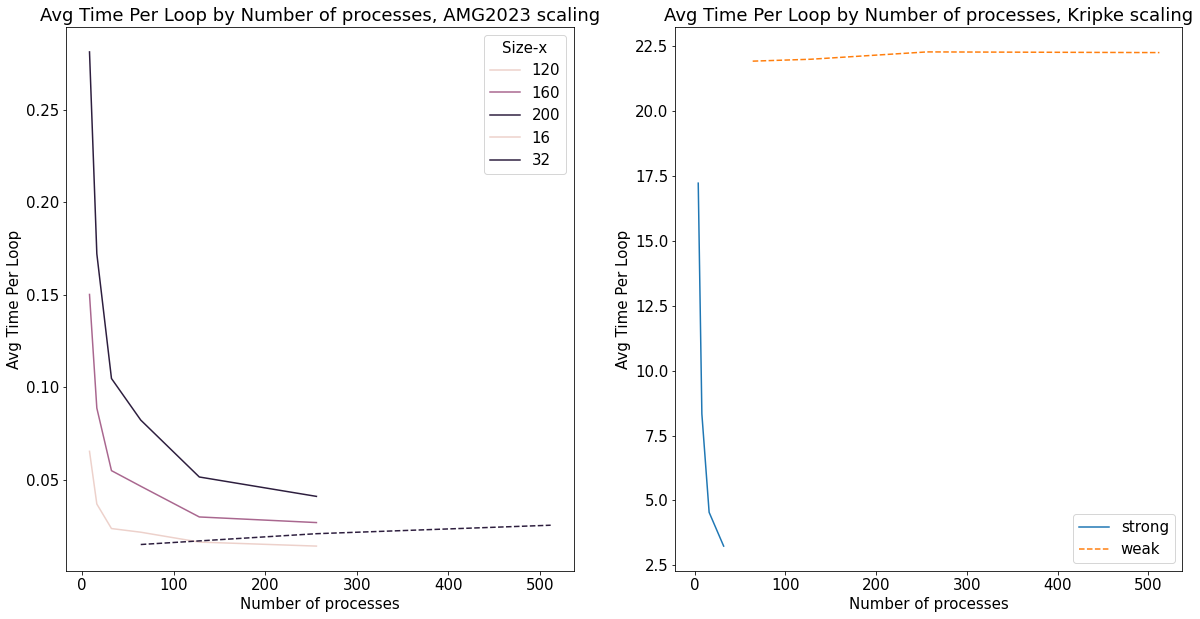

<Figure size 432x288 with 0 Axes>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")

sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Number of processes, AMG2023 scaling')
ax[1].set_title('Avg Time Per Loop by Number of processes, Kripke scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')



# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop.png")

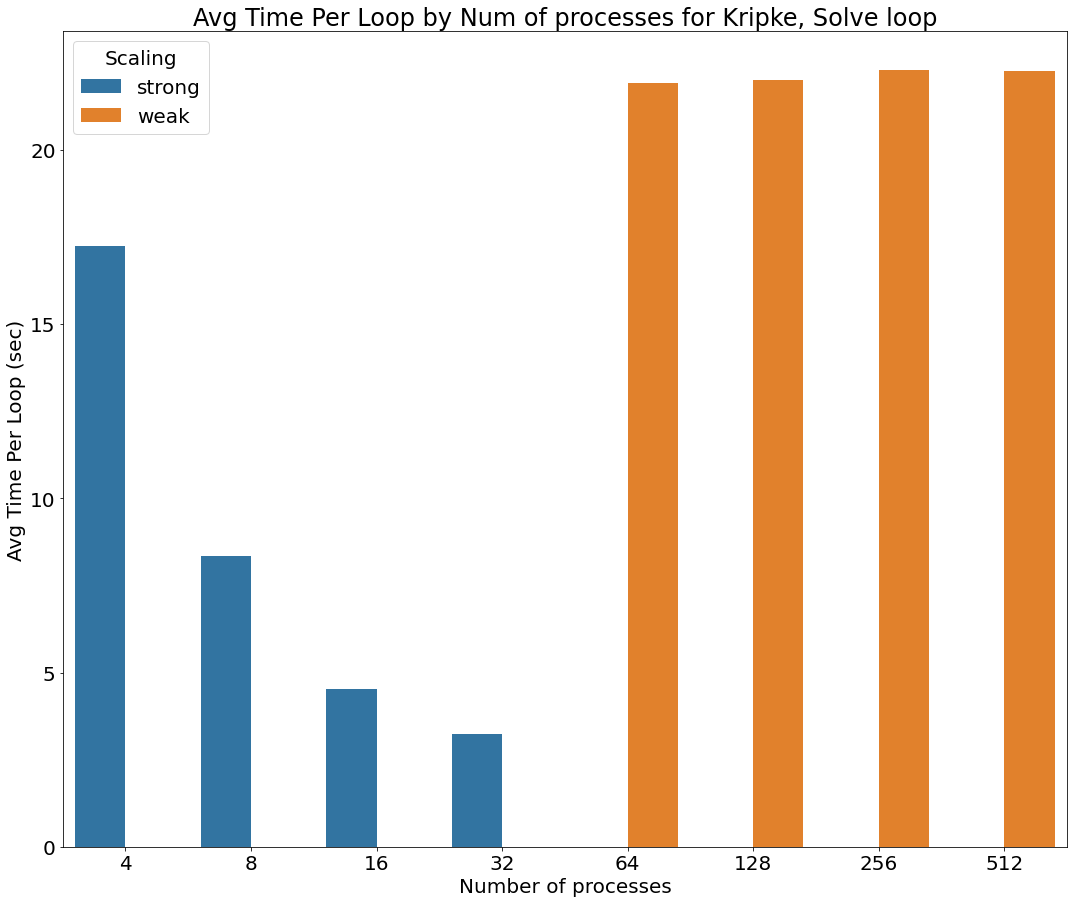

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 20})

#amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1, figsize=(18, 15))

combined_data = pd.concat([kripke_node_strong, kripke_node_weak])
#sns.barplot(data=combined_data, x='mpi.world.size', ax=ax, y='Avg Time Per Loop', hue="Scaling")
sns.barplot(data=combined_data, x="mpi.world.size", y="Avg Time Per Loop", hue="Scaling", ax=ax)


#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

#sns.barplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Avg Time Per Loop', hue="Scaling")
#sns.barplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', hue="Scaling")

ax.set_title('Avg Time Per Loop by Num of processes for Kripke, Solve loop')
#ax.set_title('Avg Time Per Loop by Num of processes, Kripke weak scaling')
#plt.xlabel('Number of processes')
#plt.ylabel('Avg Time Per Loop (sec)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax.set_xlabel('Number of processes')
#ax[1].set_xlabel('Number of processes')
ax.set_ylabel('Avg Time Per Loop (sec)')
#ax[1].set_ylabel('Avg Time Per Loop (sec)')


#ax[0].set_xticks([8, 16, 32], ['8', '16', '32'])
#ax[1].set_xticks([8, 16, 32], ['8', '16', '32'])
# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop Kripke_combined.png", facecolor='white', transparent=False)

# Average time per loop Kripke 

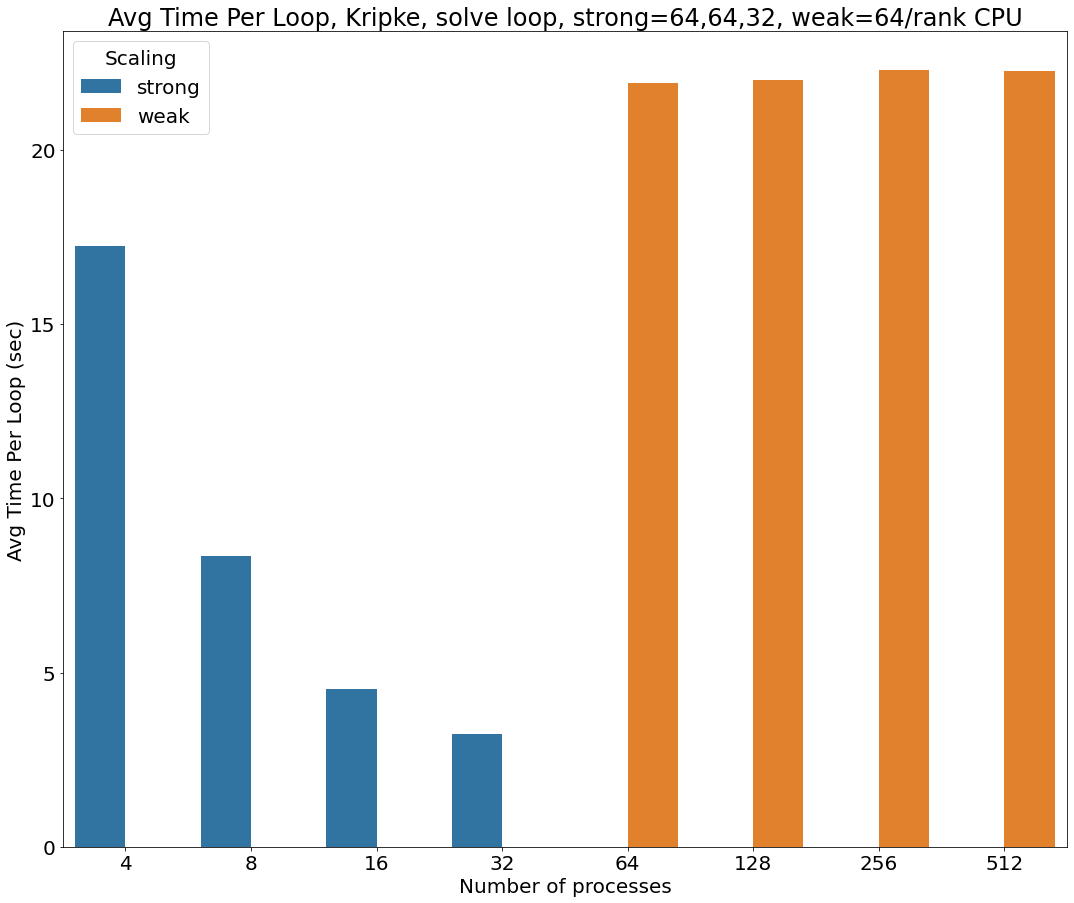

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 20})

#amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]
#print(kripke_node_strong['zones'])
#print(kripke_node_strong.info())

kripke_node_strong64 = kripke_node_strong[kripke_node_strong['zones'] == '{64,64,32}']

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1, figsize=(18, 15))

combined_data = pd.concat([kripke_node_strong64, kripke_node_weak])
#sns.barplot(data=combined_data, x='mpi.world.size', ax=ax, y='Avg Time Per Loop', hue="Scaling")
sns.barplot(data=combined_data, x="mpi.world.size", y="Avg Time Per Loop", hue="Scaling", ax=ax)


#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

#sns.barplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Avg Time Per Loop', hue="Scaling")
#sns.barplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', hue="Scaling")

ax.set_title('Avg Time Per Loop, Kripke, solve loop, strong=64,64,32, weak=64/rank CPU')
#ax.set_title('Avg Time Per Loop by Num of processes, Kripke weak scaling')
#plt.xlabel('Number of processes')
#plt.ylabel('Avg Time Per Loop (sec)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax.set_xlabel('Number of processes')
#ax[1].set_xlabel('Number of processes')
ax.set_ylabel('Avg Time Per Loop (sec)')
#ax[1].set_ylabel('Avg Time Per Loop (sec)')


#ax[0].set_xticks([8, 16, 32], ['8', '16', '32'])
#ax[1].set_xticks([8, 16, 32], ['8', '16', '32'])
# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop Kripke_combined_CPU.png", facecolor='white', transparent=False)

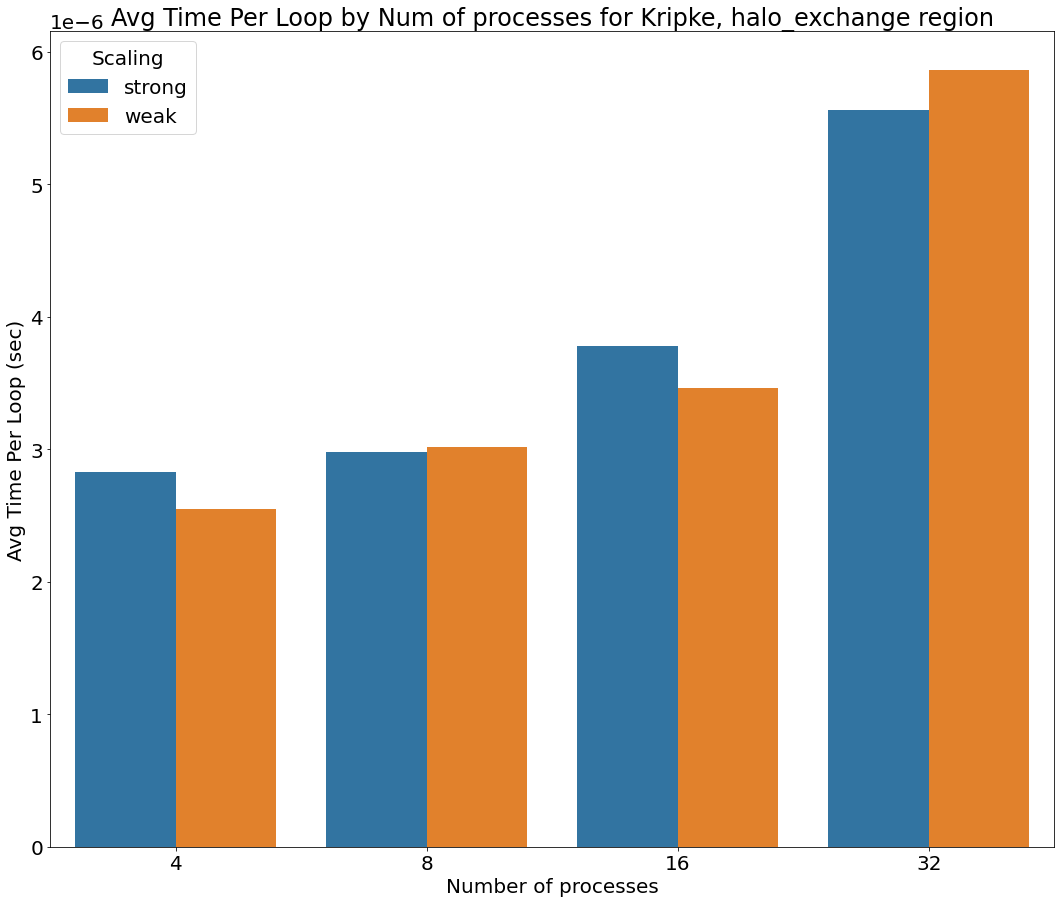

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

#amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1, figsize=(18, 15))

combined_data = pd.concat([kripke_node_strong, kripke_node_weak])
sns.barplot(data=combined_data, x="mpi.world.size", y="Avg Time Per Loop", hue="Scaling", ax=ax)

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

#sns.barplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Avg Time Per Loop', hue="Scaling")
#sns.barplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', hue="Scaling")

#sns.barplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Avg Time Per Loop')
#sns.barplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop')

ax.set_title('Avg Time Per Loop by Num of processes for Kripke, halo_exchange region')
#ax[1].set_title('Avg Time Per Loop by Num of processes, Kripke weak, halo region')
#plt.xlabel('Number of processes')
#plt.ylabel('Avg Time Per Loop (sec)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax.set_xlabel('Number of processes')
#ax[1].set_xlabel('Number of processes')
ax.set_ylabel('Avg Time Per Loop (sec)')
#ax[1].set_ylabel('Avg Time Per Loop (sec)')


#ax[0].set_xticks([8, 16, 32], ['8', '16', '32'])
#ax[1].set_xticks([8, 16, 32], ['8', '16', '32'])
# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop Kripke_halo_combined.png", facecolor='white', transparent=False)

/tmp/ipykernel_3029937/675072882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kripke_node_weak["Scaling"] = "Weak"
/tmp/ipykernel_3029937/675072882.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kripke_node_strong["Scaling"] = "Strong"


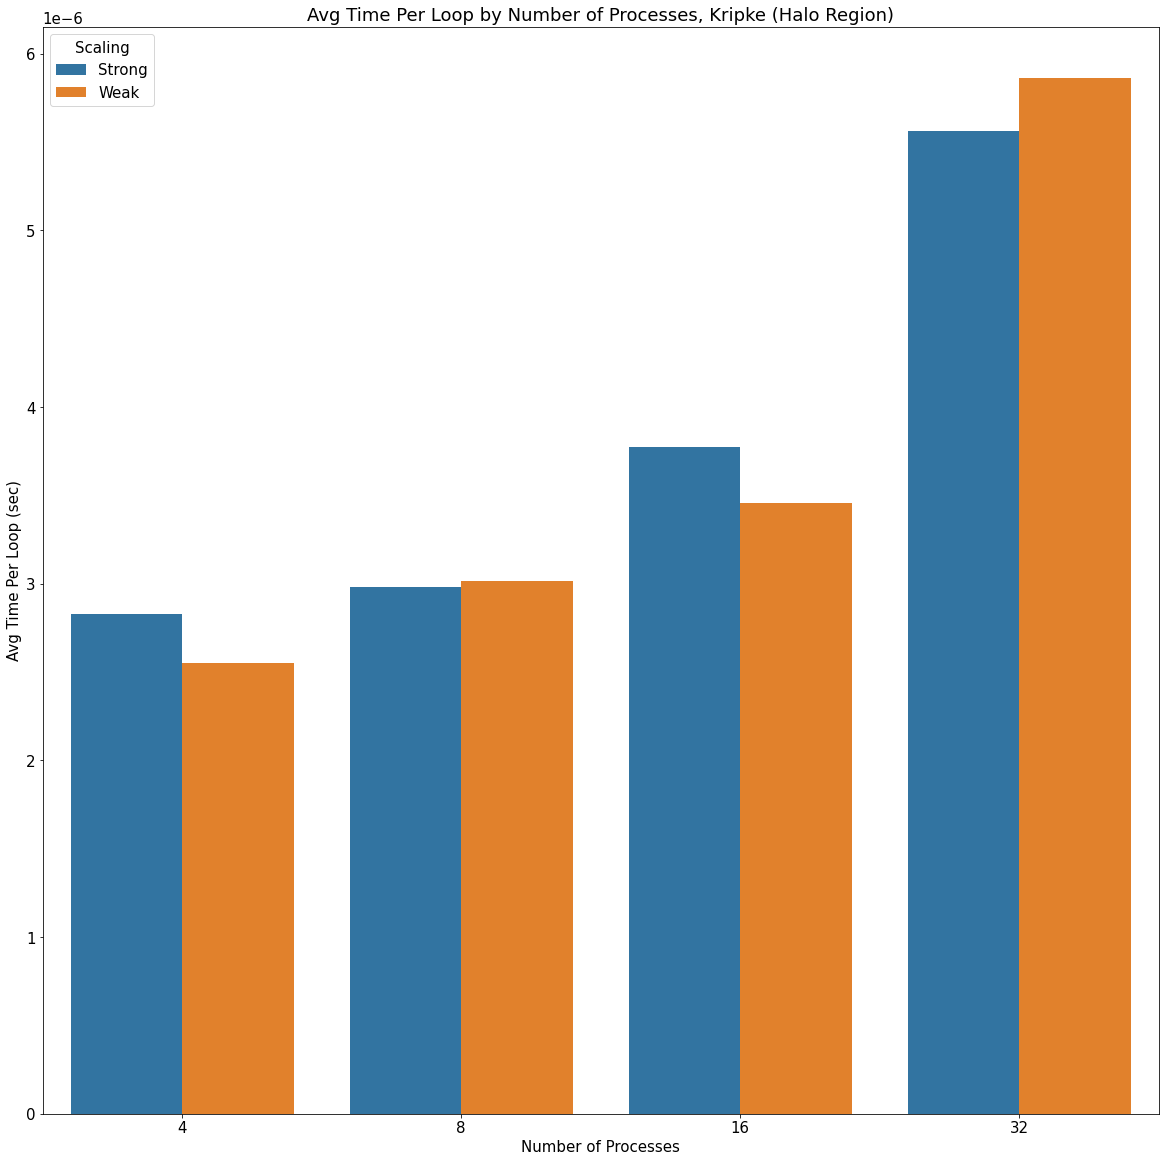

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 15})

# Filtering and labeling the datasets
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[
    filtered_tk_kripke_weak.get_node("halo_exchange")
]
kripke_node_weak["Scaling"] = "Weak"

kripke_node_strong = filtered_tk_kripke.dataframe.loc[
    filtered_tk_kripke.get_node("halo_exchange")
]
kripke_node_strong["Scaling"] = "Strong"

# Combine the filtered datasets
combined_data = pd.concat([kripke_node_strong, kripke_node_weak])

# Plotting combined data
fig, ax = plt.subplots(figsize=(20, 20))

sns.barplot(
    data=combined_data,
    x="mpi.world.size",
    y="Avg Time Per Loop",
    hue="Scaling",
    ax=ax
)

# Set titles and labels
ax.set_title("Avg Time Per Loop by Number of Processes, Kripke (Halo Region)")
ax.set_xlabel("Number of Processes")
ax.set_ylabel("Avg Time Per Loop (sec)")

# Display the plot
plt.show()

# Save the plot
fig.savefig("Avg_Time_Per_Loop_Kripke_Halo_Combined.png", facecolor="white", transparent=False)


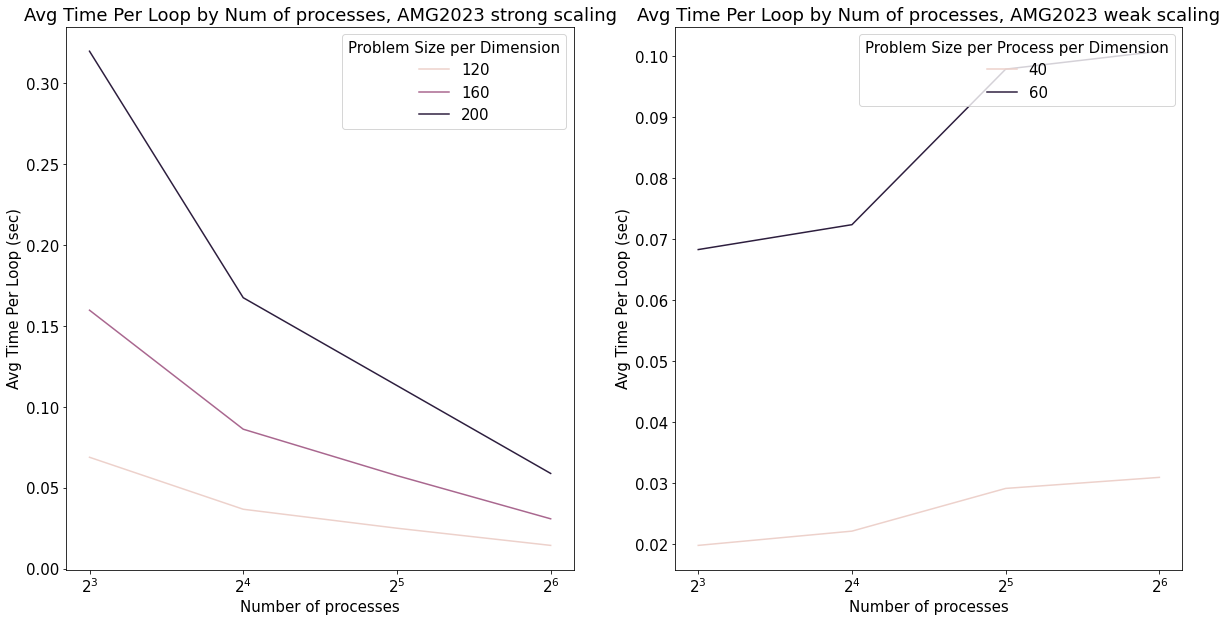

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Size-x")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Num of processes, AMG2023 strong scaling')
ax[1].set_title('Avg Time Per Loop by Num of processes, AMG2023 weak scaling')

ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Avg Time Per Loop (sec)')
ax[1].set_ylabel('Avg Time Per Loop (sec)')


ax[1].legend(title='Problem Size per Process per Dimension', loc='upper right',)
ax[0].legend(title='Problem Size per Dimension', loc='upper right',)


# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop AMG2023_large.png", facecolor='white', transparent=False)

# average time per loop halo_exchange

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Size-x")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Num Proc,AMG2023 strong,halo_region')
ax[1].set_title('Avg Time Per Loop by Num Proc, AMG2023 weak, halo_region')

ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Avg Time Per Loop (sec)')
ax[1].set_ylabel('Avg Time Per Loop (sec)')

ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=0)


ax[1].legend(title='Problem Size per Process per Dimension', loc='upper right',)
ax[0].legend(title='Problem Size per Dimension', loc='upper right',)

#ax[0].set_xticks([8, 16, 32, 64, 128, 256], ['8', '16', '32', '64', '128', '256'])
#ax[1].set_xticks([8, 16, 32, 64, 128, 256], ['8', '16', '32', '64', '128', '256'])


# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop AMG2023_large_halo.png", facecolor='white', transparent=False)

# # Bytes per second Kripke and AMG

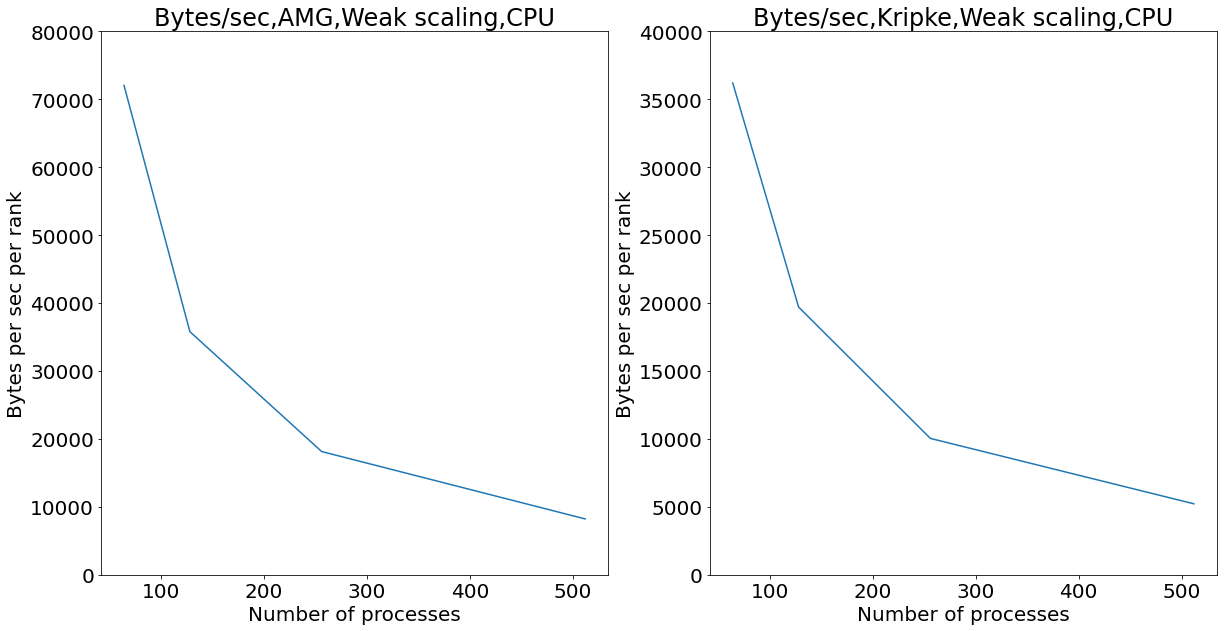

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]
#kripke_node_weak_filtered = kripke_node_weak[kripke_node_weak['mpi.world.size'] != 4]

amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Bytes per sec')
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes per sec')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes per sec')

ax[0].set_title('Bytes/sec,AMG,Weak scaling,CPU')
ax[1].set_title('Bytes/sec,Kripke,Weak scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Bytes per sec per rank')
ax[1].set_ylabel('Bytes per sec per rank')
ax[0].set_ylim(0,80000)
ax[1].set_ylim(0,40000)


# Display the plot
plt.show()
fig.savefig("Bytes per sec AMG_Kripke_weak_cpu.png", facecolor='white', transparent=False)

# Messages per second, Kripke and AMG

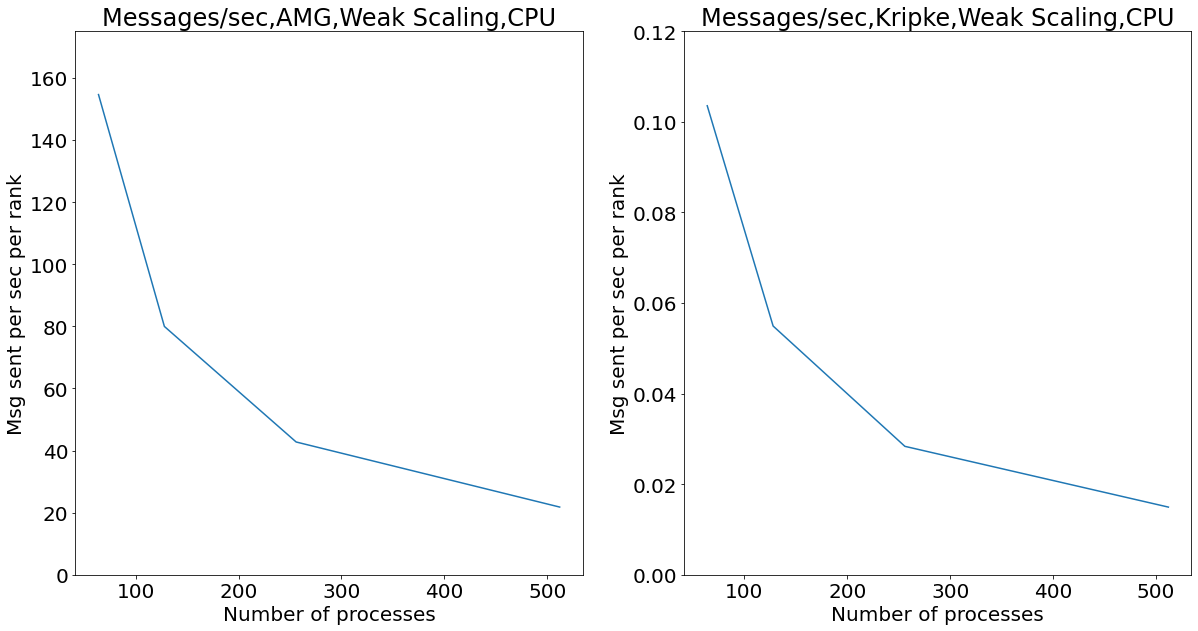

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Msg sent per sec')

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Msg sent per sec')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Msg sent per sec')

ax[0].set_title('Messages/sec,AMG,Weak Scaling,CPU')
ax[1].set_title('Messages/sec,Kripke,Weak Scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Msg sent per sec per rank')
ax[1].set_ylabel('Msg sent per sec per rank')
ax[0].set_ylim(0,175)
ax[1].set_ylim(0,0.12)

# Display the plot
plt.show()
fig.savefig("Messages per sec AMG_Kripke_cpu.png", facecolor='white', transparent=False)

# Average time per loop 

{384601513: <thicket.thicket.Thicket object at 0x7ffeff48d970>, 672734103: <thicket.thicket.Thicket object at 0x7ffeff41bac0>, 1858626411: <thicket.thicket.Thicket object at 0x7ffeff3d4b20>, 3472529328: <thicket.thicket.Thicket object at 0x7ffeff47a670>}


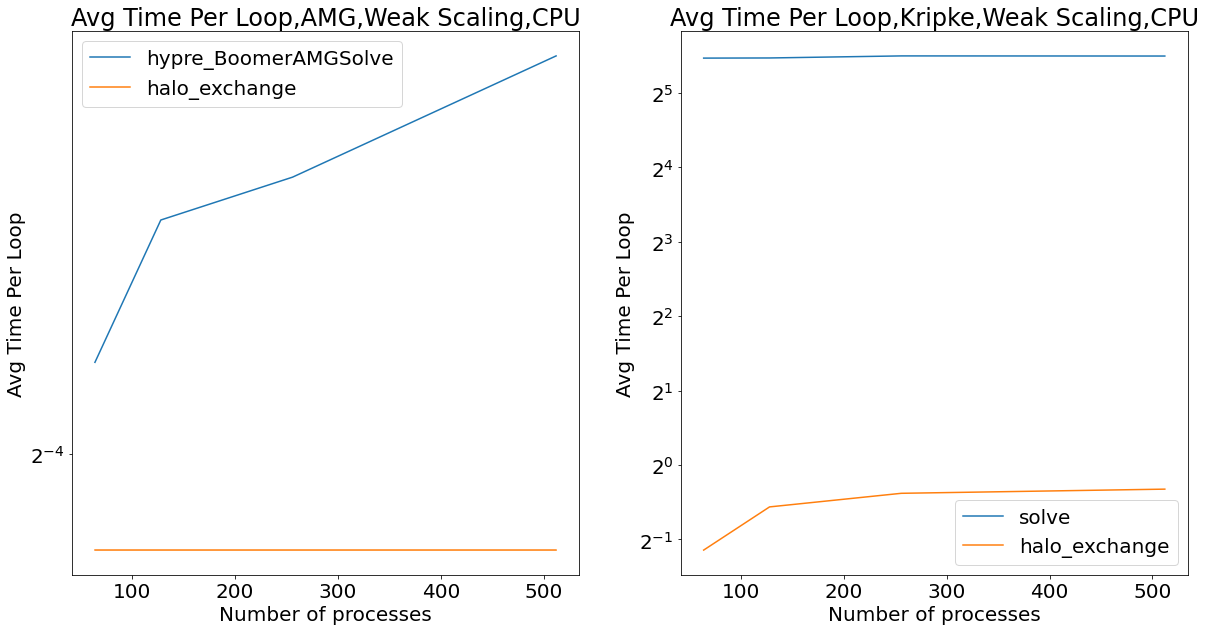

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 20})

amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]
#kripke_node_weak_filtered = kripke_node_weak[kripke_node_weak['mpi.world.size'] != 4]
gb = filtered_tk_amg_halo_weak_test.groupby(["profile"])
print(gb)

halo_parent_functions = ['hypre_ParCSRMatrixMatvecOutOfPlaceHost', 'hypre_ParCSRMatrixMatvecTHost', 'hypre_GaussElimSolve']
halo_child_functions = ['MPI_Irecv', 'MPI_Isend', 'MPI_Waitall'] 
b_agg = pd.DataFrame()
for key, ttk in gb.items(): 
    amg_node_weak_halo_filtered_no_PC = ttk[~ttk['name'].isin(halo_parent_functions + halo_child_functions)]
    b_agg["profile"] = amg_node_weak_halo_filtered_no_PC['Avg Time Per Loop'].sum(min_count=1)
    
display(gb_agg[('node', 'profile')].dataframe)

amg_node_weak_halo = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("halo_exchange")]
kripke_node_weak_halo = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]


#print(amg_node_weak_halo_filtered)
Total_Avg = amg_node_weak_halo_filtered_no_PC['Avg Time Per Loop'].sum(min_count=1)
amg_node_weak_halo_filtered_no_PC['Total_Avg'] = Total_Avg


amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

amg_node_strong_halo = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("halo_exchange")]
kripke_node_strong_halo = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', label="hypre_BoomerAMGSolve")
sns.lineplot(data=amg_node_weak_halo_filtered_no_PC, ax=ax[0], x='mpi.world.size', y='Total_Avg', label="halo_exchange")

sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="solve")
sns.lineplot(data=kripke_node_weak_halo, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="halo_exchange")

ax[0].set_title('Avg Time Per Loop,AMG,Weak Scaling,CPU')
ax[1].set_title('Avg Time Per Loop,Kripke,Weak Scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Avg Time Per Loop')
ax[1].set_ylabel('Avg Time Per Loop')
ax[0].set_yscale("log", base=2)
ax[1].set_yscale("log", base=2)

# Display the plot
plt.show()
fig.savefig("Avg Time Per Loop_AMG_Kripke_cpu.png", facecolor='white', transparent=False)

In [43]:
amg_node_weak_halo_filtered.index

MultiIndex([({'name': 'halo_exchange', 'type': 'function'},  384601513),
            ({'name': 'halo_exchange', 'type': 'function'},  672734103),
            ({'name': 'halo_exchange', 'type': 'function'}, 1858626411),
            ({'name': 'halo_exchange', 'type': 'function'}, 3472529328),
            ({'name': 'halo_exchange', 'type': 'function'},  384601513),
            ({'name': 'halo_exchange', 'type': 'function'},  672734103),
            ({'name': 'halo_exchange', 'type': 'function'}, 1858626411),
            ({'name': 'halo_exchange', 'type': 'function'}, 3472529328),
            ({'name': 'halo_exchange', 'type': 'function'},  384601513),
            ({'name': 'halo_exchange', 'type': 'function'},  672734103),
            ...
            ({'name': 'halo_exchange', 'type': 'function'}, 3472529328),
            ({'name': 'halo_exchange', 'type': 'function'}, 1858626411),
            ({'name': 'halo_exchange', 'type': 'function'}, 3472529328),
            ({'name': 'halo_exchang

# Total Time per loop 

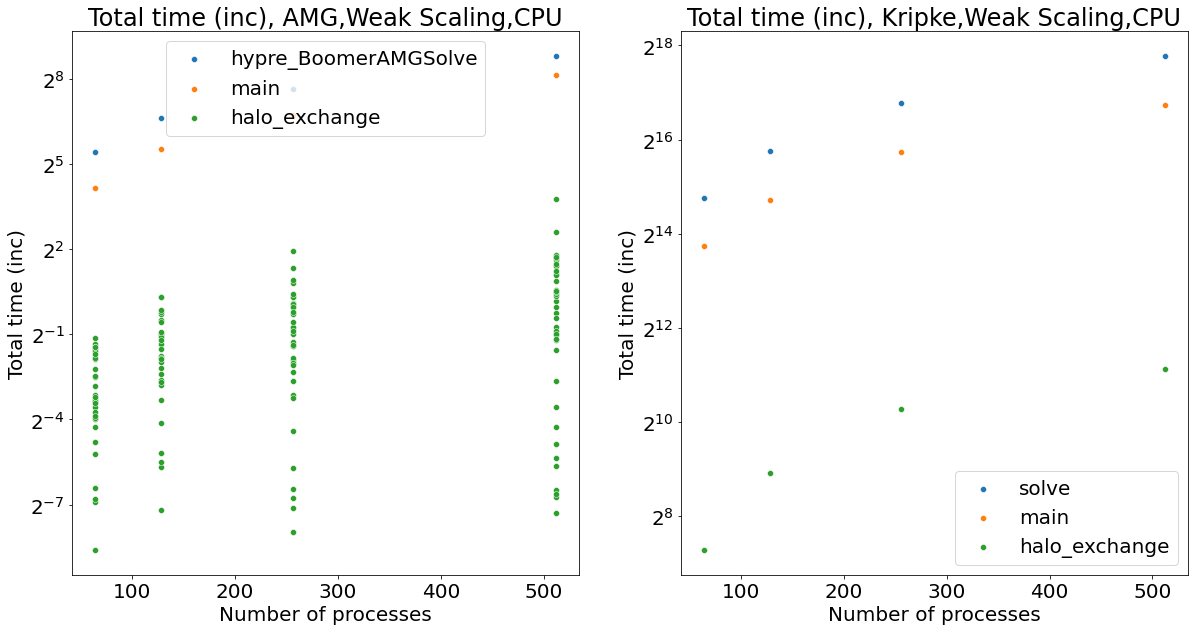

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
amg_node_weak_main = tk_amg2023_weak.dataframe.loc[tk_amg2023_weak.get_node("main")]

kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]
kripke_node_weak_main = tk_kripke_weak.dataframe.loc[tk_kripke_weak.get_node("main")]
#kripke_node_weak_filtered = kripke_node_weak[kripke_node_weak['mpi.world.size'] != 4]

amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
amg_node_strong_main = tk_amg2023.dataframe.loc[tk_amg2023.get_node("main")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]
kripke_node_strong_main = tk_kripke.dataframe.loc[tk_kripke.get_node("main")]

amg_node_strong_halo = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("halo_exchange")]
kripke_node_strong_halo = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
kripke_node_weak_halo = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]
amg_node_weak_halo = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("halo_exchange")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
sns.scatterplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="hypre_BoomerAMGSolve")
sns.scatterplot(data=amg_node_weak_main, ax=ax[0], x='mpi.world.size', y='Total time', label="main")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Msg sent per sec')
sns.scatterplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Total time (inc)', label="solve")
sns.scatterplot(data=kripke_node_weak_main, x='mpi.world.size', ax=ax[1], y='Total time', label="main")

sns.scatterplot(data=amg_node_weak_halo, ax=ax[0], x='mpi.world.size', y='Total time (inc)', label="halo_exchange")
sns.scatterplot(data=kripke_node_weak_halo, x='mpi.world.size', ax=ax[1], y='Total time (inc)', label="halo_exchange")

ax[0].set_title('Total time (inc), AMG,Weak Scaling,CPU')
ax[1].set_title('Total time (inc), Kripke,Weak Scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
ax[0].set_yscale("log", base=2)
ax[1].set_yscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Total time (inc)')
ax[1].set_ylabel('Total time (inc)')
#ax[0].set_ylim(0, 100)
#ax[1].set_ylim(0, 1800)

#plt.legend(loc='lower right')

# Display the plot
plt.show()
fig.savefig("Total time (inc)_AMG_Kripke_cpu.png", facecolor='white', transparent=False)

# Avg src ranks, AMG and Kripke

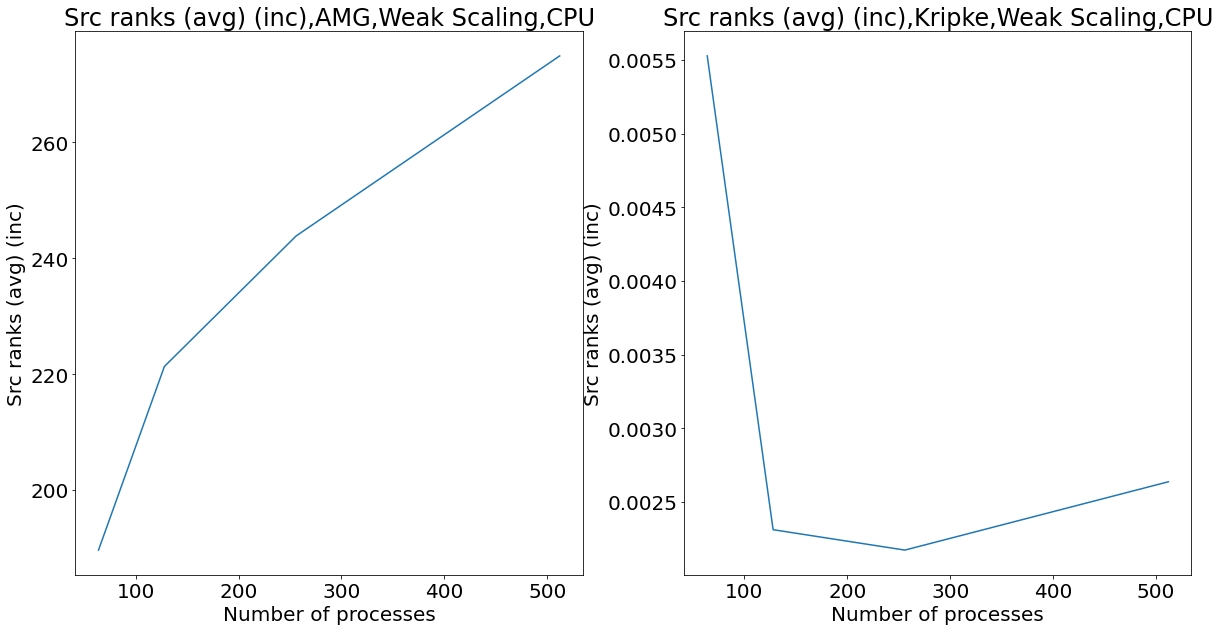

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]


#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Src ranks (avg) (inc)')

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Msg sent per sec')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (avg) (inc)')

ax[0].set_title('Src ranks (avg) (inc),AMG,Weak Scaling,CPU')
ax[1].set_title('Src ranks (avg) (inc),Kripke,Weak Scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Src ranks (avg) (inc)')
ax[1].set_ylabel('Src ranks (avg) (inc)')
#ax[0].set_ylim(0,175)
#ax[1].set_ylim(0,0.12)

# Display the plot
plt.show()
fig.savefig("Src ranks (avg) (inc) AMG_Kripke_cpu.png", facecolor='white', transparent=False)

# Dst Ranks Average, AMG and Kripke 

In [ ]:
#print(filtered_tk_amg_weak.tree(metric_column="Dst ranks (max)"))

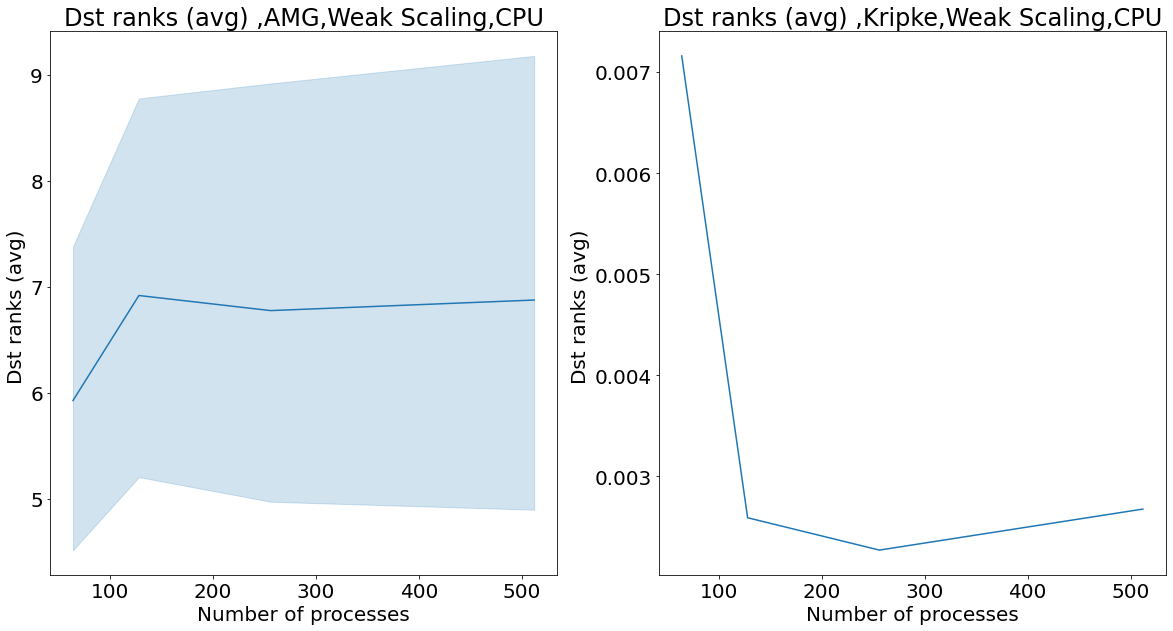

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

amg_node_weak = filtered_tk_amg_weak.dataframe.loc[filtered_tk_amg_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg.dataframe.loc[filtered_tk_amg.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]


amg_node_weak_p = tk_amg2023_weak.dataframe.loc[tk_amg2023_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak_p = tk_kripke_weak.dataframe.loc[tk_kripke_weak.get_node("solve")]

amg_node_strong_p = tk_amg2023.dataframe.loc[tk_amg2023.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong_p = tk_kripke.dataframe.loc[tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Dst ranks (avg)')

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Msg sent per sec')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Dst ranks (avg)')

ax[0].set_title('Dst ranks (avg) ,AMG,Weak Scaling,CPU')
ax[1].set_title('Dst ranks (avg) ,Kripke,Weak Scaling,CPU')
#plt.xlabel('Number of processes')
#plt.ylabel('Bytes sent (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
ax[0].set_ylabel('Dst ranks (avg) ')
ax[1].set_ylabel('Dst ranks (avg) ')
#ax[0].set_ylim(0,175)
#ax[1].set_ylim(0,0.12)

# Display the plot
plt.show()
fig.savefig("Dst ranks (avg) (inc) AMG_Kripke_cpu.png", facecolor='white', transparent=False)

# Problem 2, average time per loop 

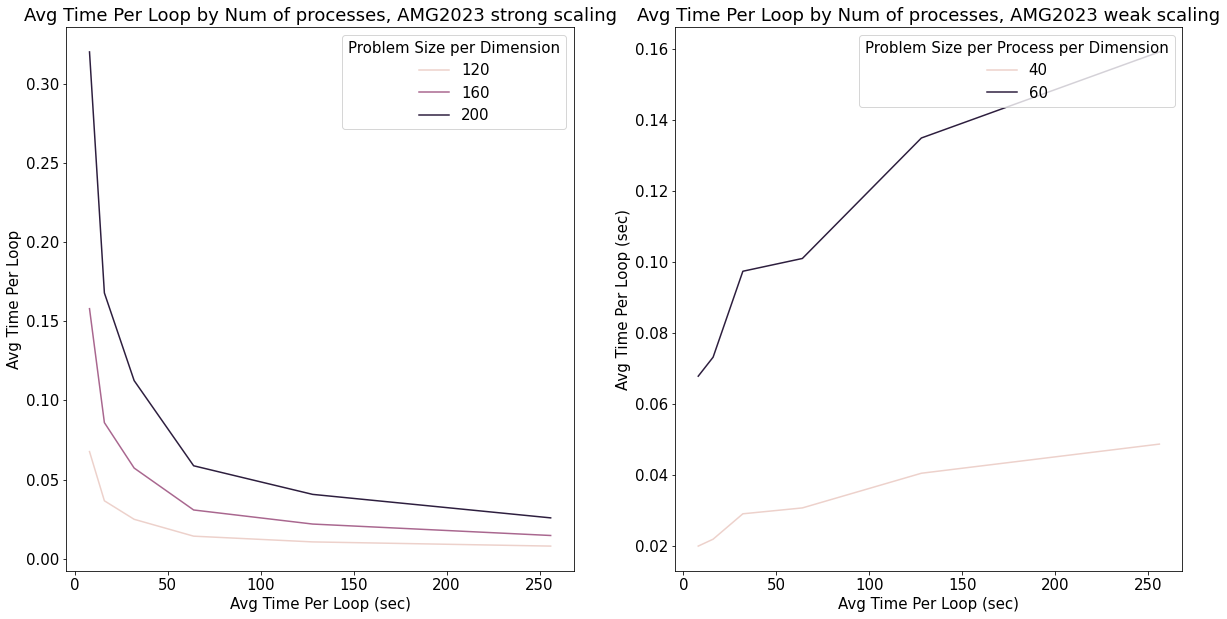

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Size-x")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Num of processes, AMG2023 strong scaling')
ax[1].set_title('Avg Time Per Loop by Num of processes, AMG2023 weak scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop (sec)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')

ax[0].set_xlabel('Avg Time Per Loop (sec)')
ax[1].set_xlabel('Avg Time Per Loop (sec)')

ax[1].legend(title='Problem Size per Process per Dimension', loc='upper right',)
ax[0].legend(title='Problem Size per Dimension', loc='upper right',)

#ax[0].set_xticks([8, 16, 32, 64], ['8', '16', '32', '64'])
#ax[1].set_xticks([8, 16, 32, 64], ['8', '16', '32', '64'])


# Display the plot
plt.show()
fig.savefig("Problem2 Avg Time Per Loop AMG2023.png", facecolor='white', transparent=False)

# Plots for Src rank (max)

<Figure size 1440x1440 with 0 Axes>

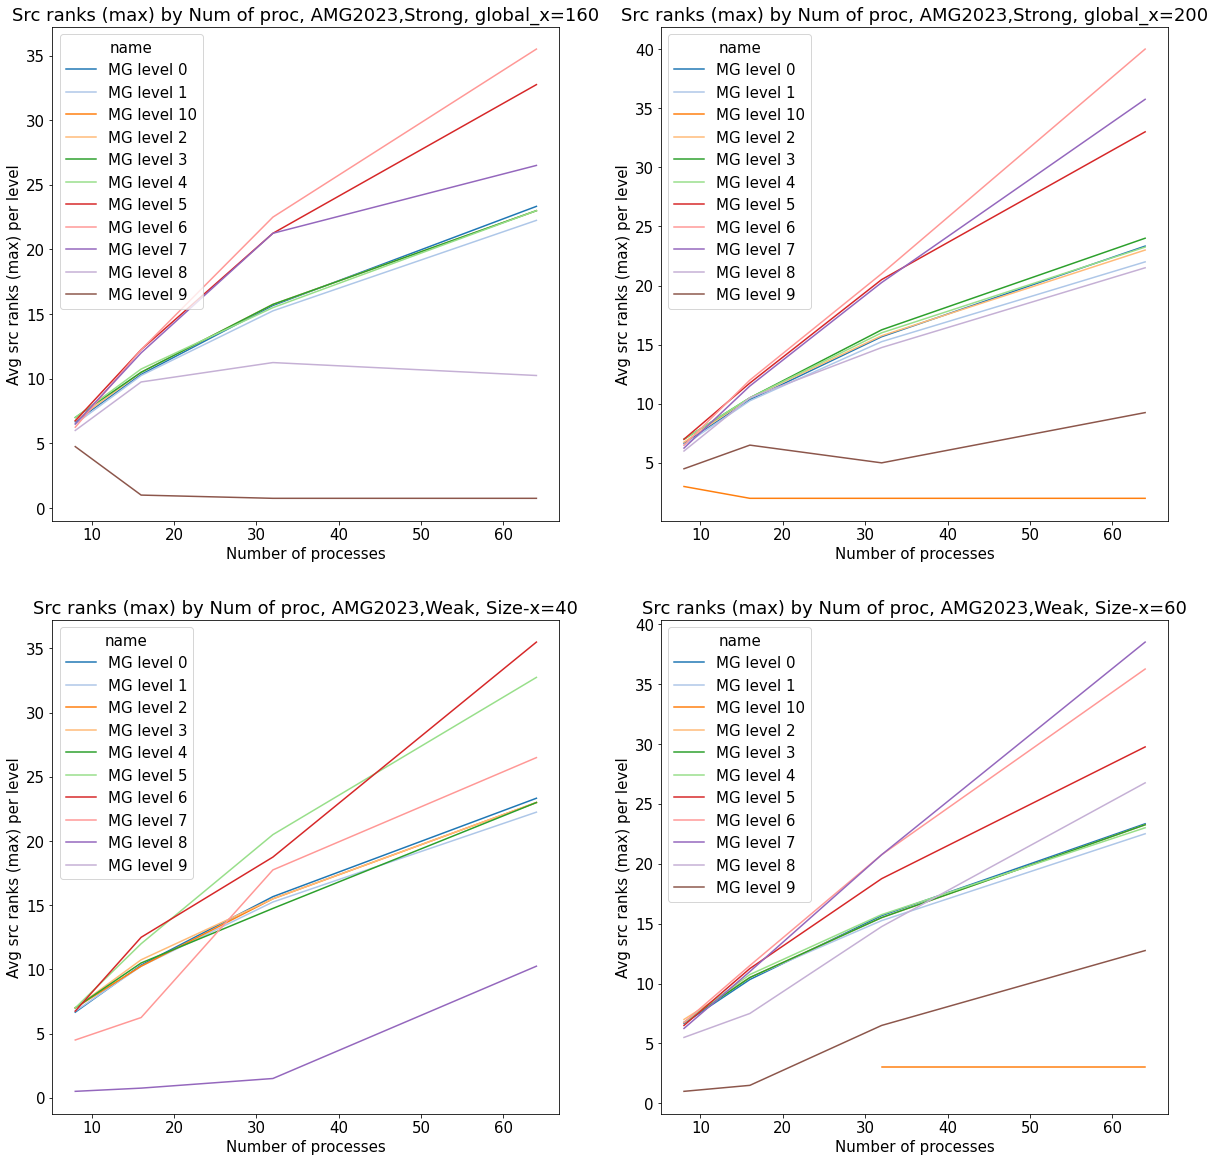

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_src_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_src_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 20))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 20), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=10))
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0,0].set_title('Src ranks (max) by Num of proc, AMG2023,Strong, global_x=160')
ax[0,1].set_title('Src ranks (max) by Num of proc, AMG2023,Strong, global_x=200')
ax[1,1].set_title('Src ranks (max) by Num of proc, AMG2023,Weak, Size-x=60')
ax[1,0].set_title('Src ranks (max) by Num of proc, AMG2023,Weak, Size-x=40')
ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')

ax[0,0].set_ylabel('Avg src ranks (max) per level')
ax[0,1].set_ylabel('Avg src ranks (max) per level')
ax[1,0].set_ylabel('Avg src ranks (max) per level')
ax[1,1].set_ylabel('Avg src ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("src_ranks AMG.png", facecolor='white', transparent=False)

# Plots for Dst rank (max)

<Figure size 1440x1440 with 0 Axes>

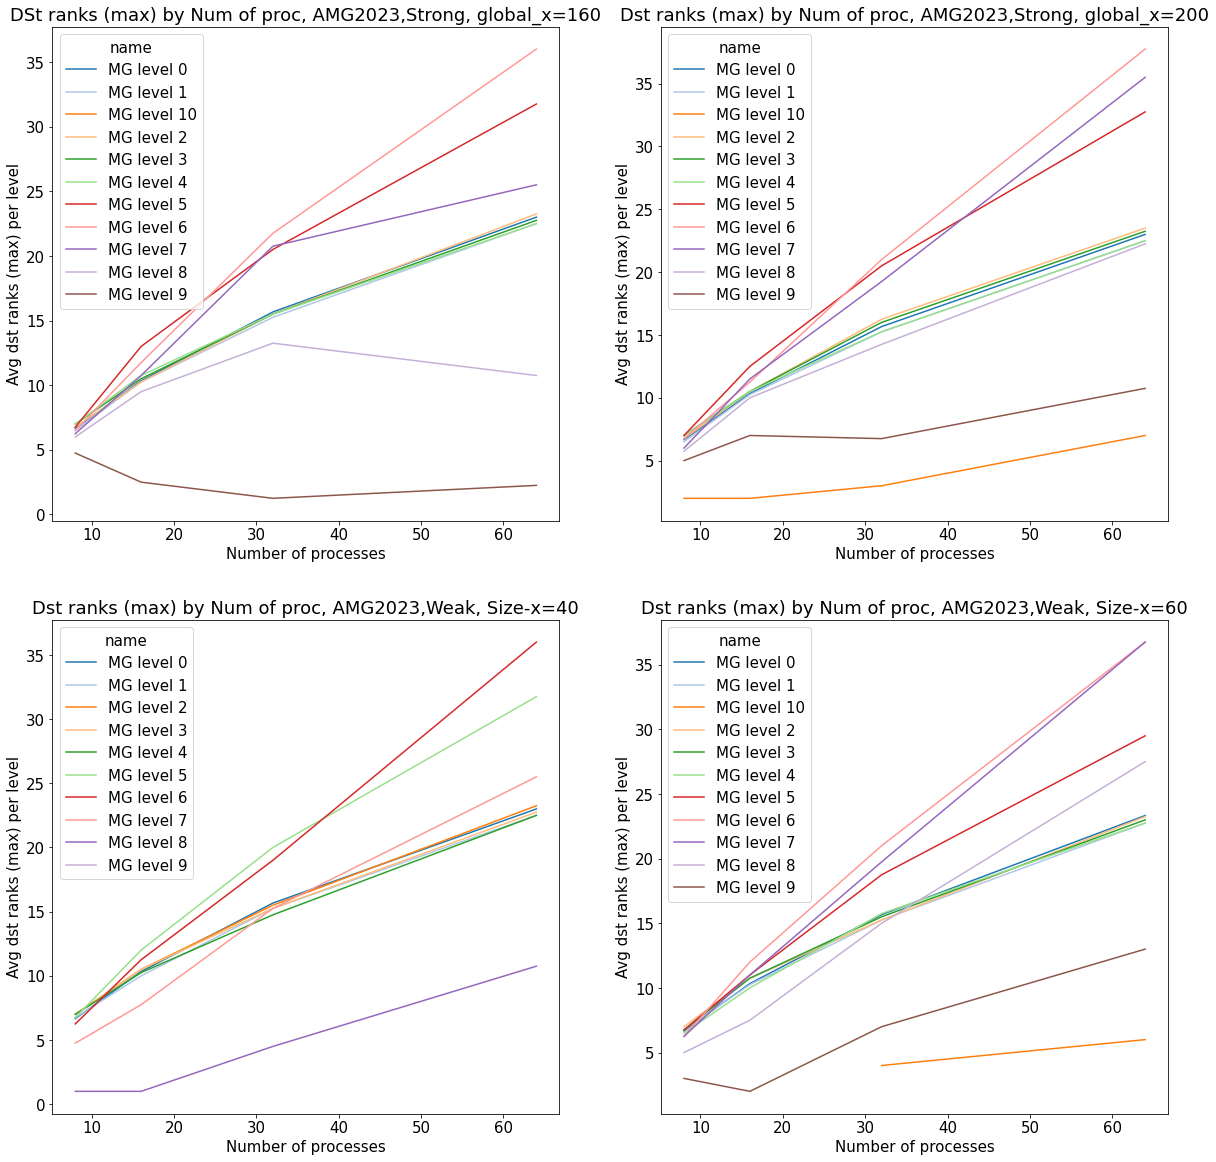

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 20))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 20), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0,0], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200, x='mpi.world.size', ax=ax[0,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60, x='mpi.world.size', ax=ax[1,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=10))
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0,0].set_title('DSt ranks (max) by Num of proc, AMG2023,Strong, global_x=160')
ax[0,1].set_title('Dst ranks (max) by Num of proc, AMG2023,Strong, global_x=200')
ax[1,1].set_title('Dst ranks (max) by Num of proc, AMG2023,Weak, Size-x=60')
ax[1,0].set_title('Dst ranks (max) by Num of proc, AMG2023,Weak, Size-x=40')
ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')

ax[0,0].set_ylabel('Avg dst ranks (max) per level')
ax[0,1].set_ylabel('Avg dst ranks (max) per level')
ax[1,0].set_ylabel('Avg dst ranks (max) per level')
ax[1,1].set_ylabel('Avg dst ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("dst_ranks AMG.png", facecolor='white', transparent=False)

# Both Src and Dst, 160, 40

<Figure size 1440x1440 with 0 Axes>

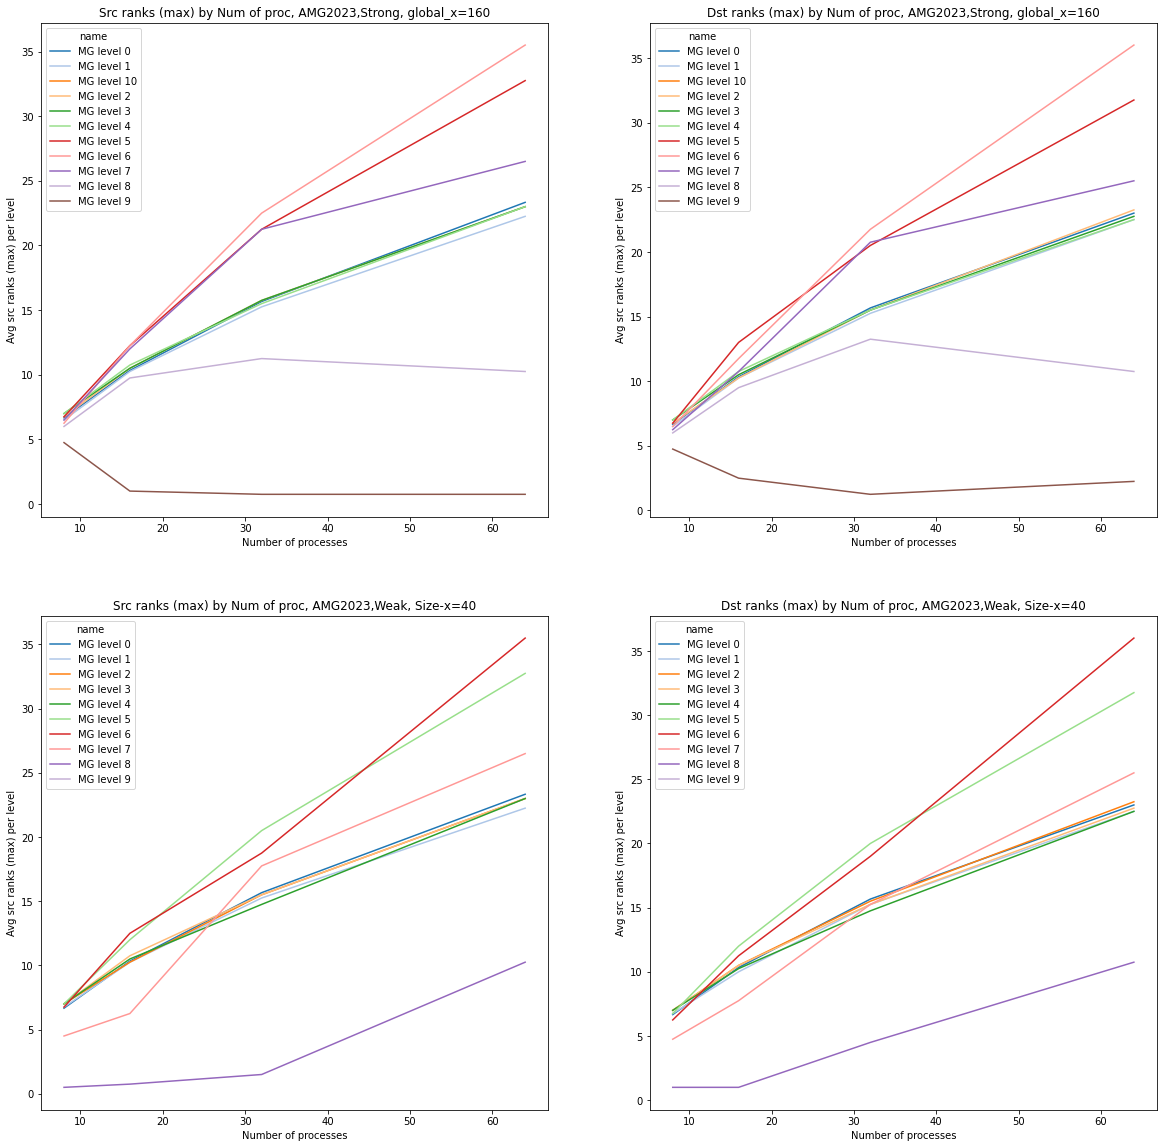

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_src_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_src_ranks", "mpi.world.size", "global_x", "name"]].dropna()

amg_node_weak_dst = filtered_tk_amg_halo_weak_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong_dst = filtered_tk_amg_halo_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


filtered_data_weak60_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 60]
filtered_data_weak40_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 40]

filtered_data_strong120_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 120]
filtered_data_strong160_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 160]
filtered_data_strong200_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 200]

#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 20))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 20), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong160_dst, x='mpi.world.size', ax=ax[0,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=10))
sns.lineplot(data=filtered_data_weak40_dst, x='mpi.world.size', ax=ax[1,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=10))

#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0,0].set_title('Src ranks (max) by Num of proc, AMG2023,Strong, global_x=160')
ax[0,1].set_title('Dst ranks (max) by Num of proc, AMG2023,Strong, global_x=160')
ax[1,0].set_title('Src ranks (max) by Num of proc, AMG2023,Weak, Size-x=40')
ax[1,1].set_title('Dst ranks (max) by Num of proc, AMG2023,Weak, Size-x=40')

ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')

ax[0,0].set_ylabel('Avg src ranks (max) per level')
ax[0,1].set_ylabel('Avg src ranks (max) per level')
ax[1,0].set_ylabel('Avg src ranks (max) per level')
ax[1,1].set_ylabel('Avg src ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("src_ranks AMG_both.png", facecolor='white', transparent=False)

ValueError: The palette list has the wrong number of colors.

<Figure size 1440x720 with 0 Axes>

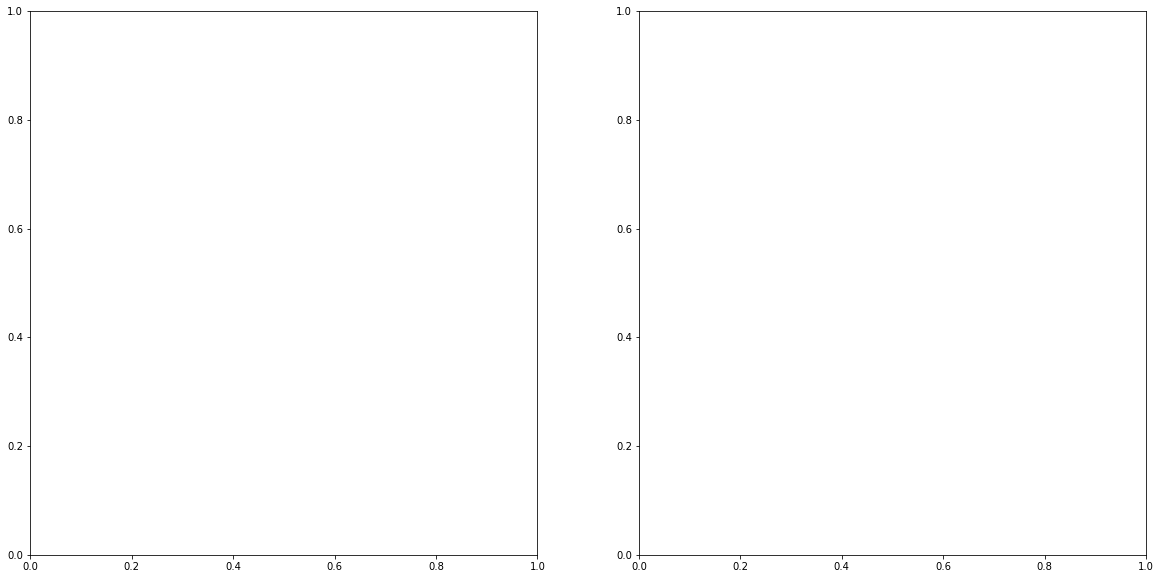

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_src_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_src_ranks", "mpi.world.size", "global_x", "name"]].dropna()

amg_node_weak_dst = filtered_tk_amg_halo_weak_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong_dst = filtered_tk_amg_halo_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


filtered_data_weak60_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 60]
filtered_data_weak40_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 40]

filtered_data_strong120_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 120]
filtered_data_strong160_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 160]
filtered_data_strong200_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 200]

#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=9))
#sns.lineplot(data=filtered_data_strong160_dst, x='mpi.world.size', ax=ax[1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=9))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60, x='mpi.world.size', ax=ax[0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60_dst, x='mpi.world.size', ax=ax[1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


#ax[0].set_title('Src ranks(max) by Num proc,AMG2023,GPU,Strong,global_x=160')
#ax[1].set_title('Dst ranks(max) by Num proc, AMG2023,GPU,Strong,global_x=160')
ax[0].set_title('Src ranks(max) by Num proc, AMG2023,Weak, Size-x=60*60*60')
ax[1].set_title('Dst ranks(max) by Num proc, AMG2023,Weak, Size-x=60*60*60')

#ax[0].set_xlabel('Number of processes')
#ax[1].set_xlabel('Number of processes')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')

ax[0].set_ylabel('Avg src ranks (max) per level')
ax[1].set_ylabel('Avg src ranks (max) per level')
#ax[1,0].set_ylabel('Avg src ranks (max) per level')
#ax[1,1].set_ylabel('Avg src ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("src_ranks AMG_weak_60.png", facecolor='white', transparent=False)

<Figure size 1440x720 with 0 Axes>

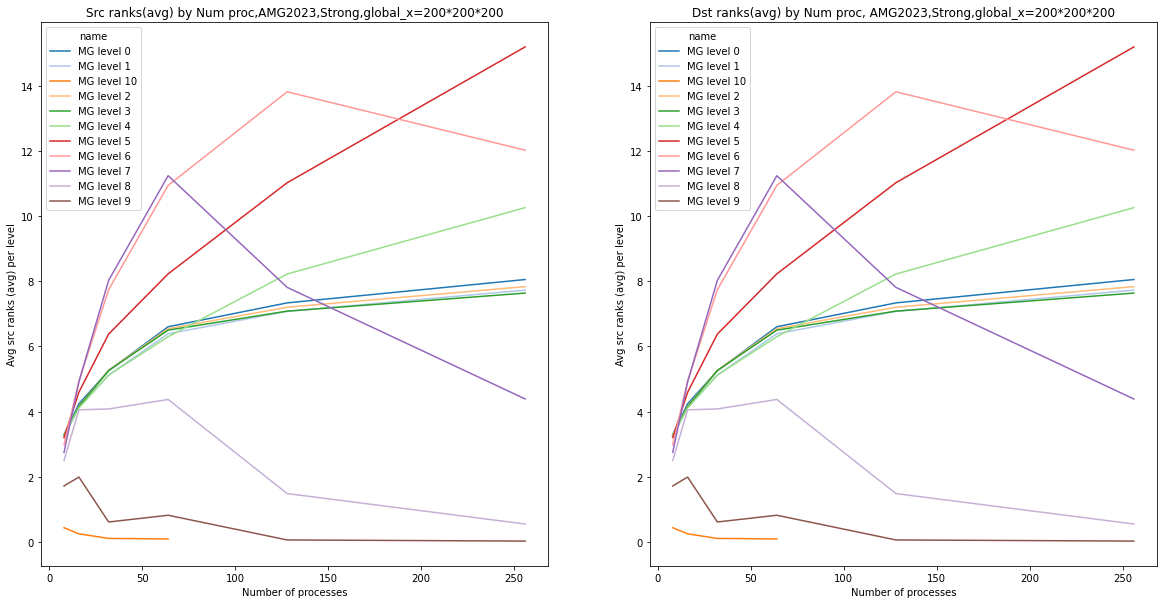

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_src_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_src_ranks", "mpi.world.size", "global_x", "name"]].dropna()

amg_node_weak_dst = filtered_tk_amg_halo_weak_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong_dst = filtered_tk_amg_halo_appended.dataframe[["avg_dst_ranks", "mpi.world.size", "global_x", "name"]].dropna()

filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]


filtered_data_weak60_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 60]
filtered_data_weak40_dst = amg_node_weak_dst[amg_node_weak['Size-x'] == 40]

filtered_data_strong120_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 120]
filtered_data_strong160_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 160]
filtered_data_strong200_dst = amg_node_strong_dst[amg_node_strong['global_x'] == 200]

#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200, x='mpi.world.size', ax=ax[0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200_dst, x='mpi.world.size', ax=ax[1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=9))
#sns.lineplot(data=filtered_data_weak40_dst, x='mpi.world.size', ax=ax[1,1], y='avg_dst_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=9))

#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1,1], y='avg_src_ranks', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))



#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0].set_title('Src ranks(avg) by Num proc,AMG2023,Strong,global_x=200*200*200')
ax[1].set_title('Dst ranks(avg) by Num proc, AMG2023,Strong,global_x=200*200*200')
#ax[1,0].set_title('Src ranks(max) by Num proc, AMG2023,GPU,Weak, Size-x=40')
#ax[1,1].set_title('Dst ranks(max) by Num proc, AMG2023,GPU,Weak, Size-x=40')

ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
#ax[1,0].set_xlabel('Number of processes')
#ax[1,1].set_xlabel('Number of processes')

ax[0].set_ylabel('Avg src ranks (avg) per level')
ax[1].set_ylabel('Avg src ranks (avg) per level')
#ax[1,0].set_ylabel('Avg src ranks (max) per level')
#ax[1,1].set_ylabel('Avg src ranks (max) per level')
#plt.ylabel('avg_src_ranks')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()

fig.savefig("src_ranks AMG_strong_200_avg.png", facecolor='white', transparent=False)

/tmp/ipykernel_208841/3801770963.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_208841/3801770963.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


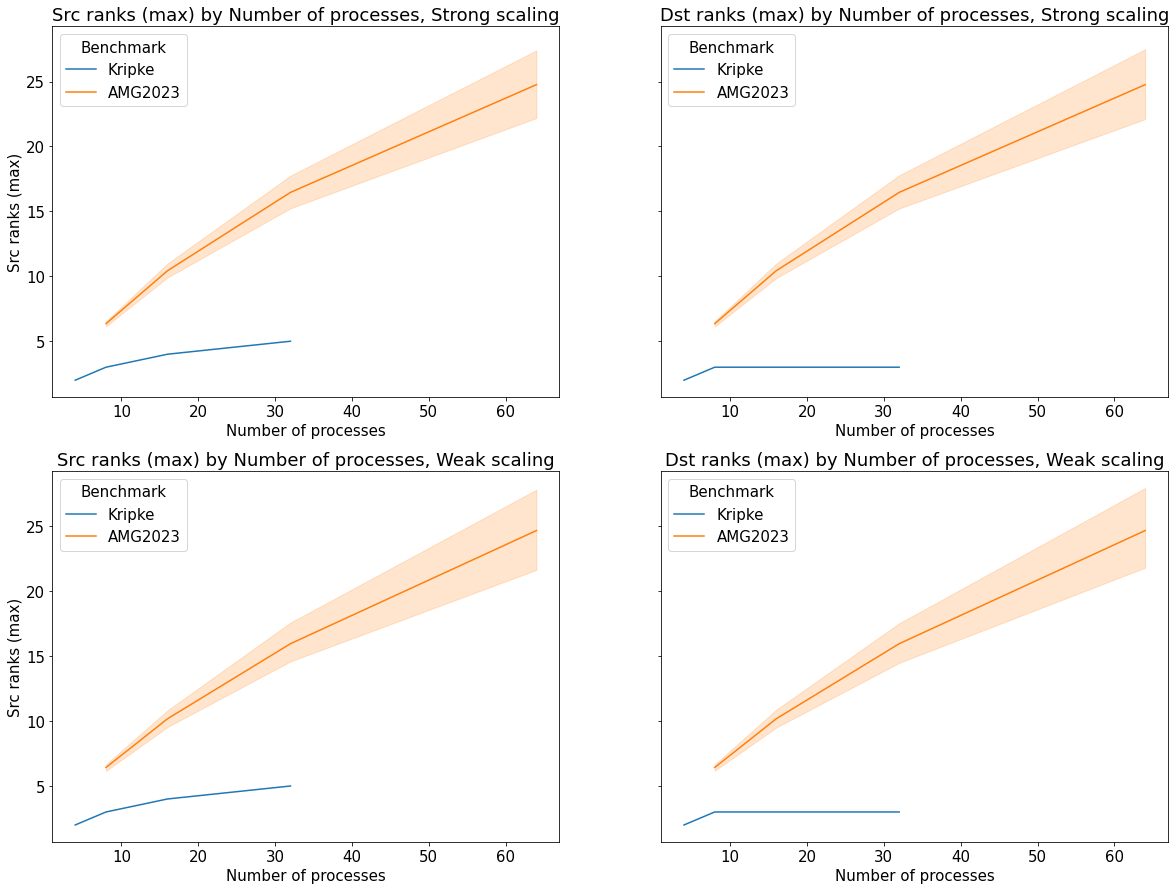

<Figure size 432x288 with 0 Axes>

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
#plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 15), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0,0], y='Src ranks (max)', hue="Benchmark")
#sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[0,1], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0,1], y='Dst ranks (max)', hue="Benchmark")
#sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,1], y='Dst ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,0], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,1], y='Dst ranks (max)', hue="Benchmark")

ax[0,0].set_title('Src ranks (max) by Number of processes, Strong scaling')
#ax[0, 1].set_title('Src ranks (max) by Number of processes, Weak scaling')
ax[0,1].set_title('Dst ranks (max) by Number of processes, Strong scaling')
ax[1, 0].set_title('Src ranks (max) by Number of processes, Weak scaling')
ax[1,1].set_title('Dst ranks (max) by Number of processes, Weak scaling')
ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')
plt.ylabel('Src ranks (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Src_Dst_ranks AMG_Kripke.png")

# Plots for Bytes sent (max)

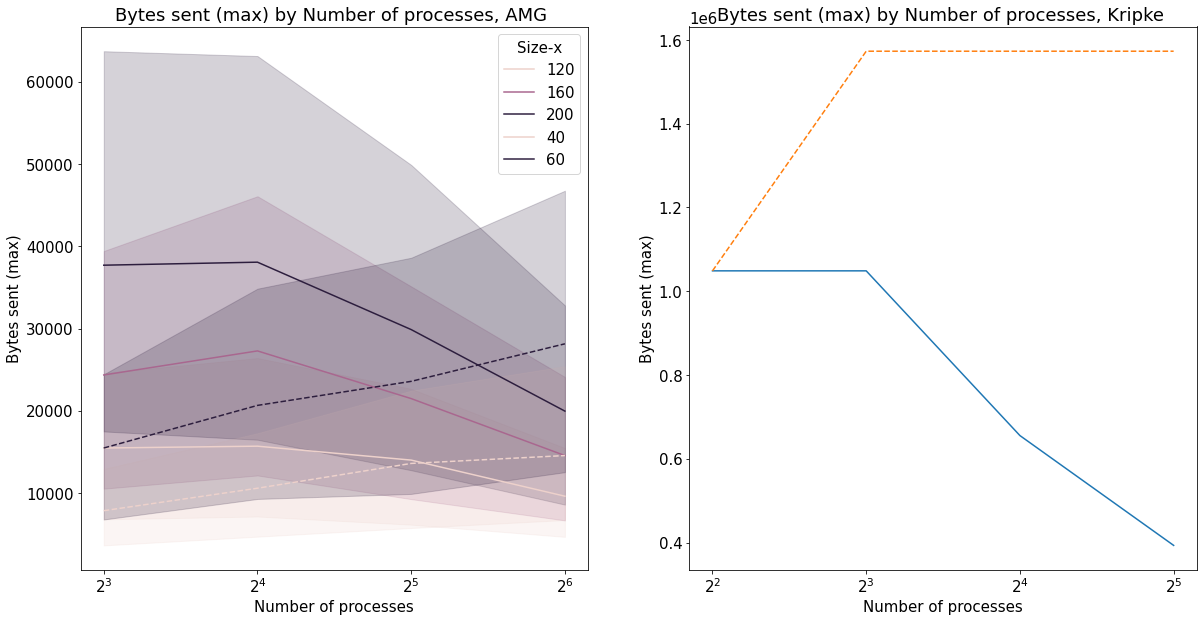

<Figure size 432x288 with 0 Axes>

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

#sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
#sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")

sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="global_x")
sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Size-x", linestyle="--")
sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', linestyle="--")


ax[0].set_title('Bytes sent (max) by Number of processes, AMG ')
ax[1].set_title('Bytes sent (max) by Number of processes, Kripke ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Bytes sent (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Bytes sent (max) AMG_Kripke.svg")

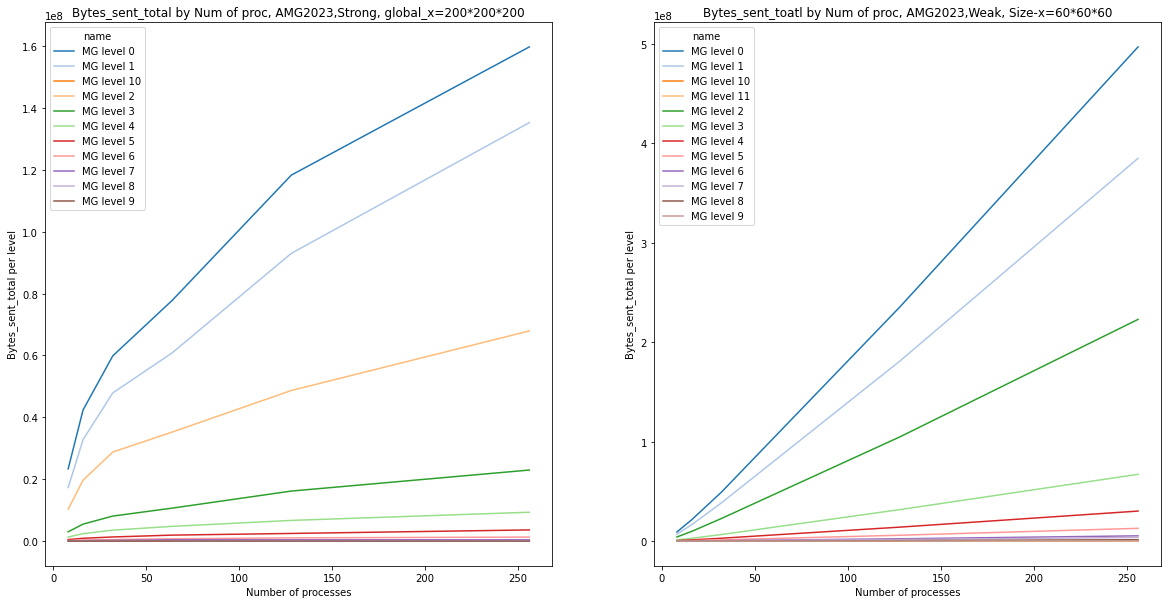

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

#amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
#kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_weak = filtered_tk_amg_halo_weak_appended.dataframe[["avg_Bytes_sent_total", "mpi.world.size", "Size-x", "name"]].dropna()
amg_node_strong = filtered_tk_amg_halo_appended.dataframe[["avg_Bytes_sent_total", "mpi.world.size", "global_x", "name"]].dropna()


filtered_data_weak60 = amg_node_weak[amg_node_weak['Size-x'] == 60]
filtered_data_weak40 = amg_node_weak[amg_node_weak['Size-x'] == 40]

filtered_data_strong120 = amg_node_strong[amg_node_strong['global_x'] == 120]
filtered_data_strong160 = amg_node_strong[amg_node_strong['global_x'] == 160]
filtered_data_strong200 = amg_node_strong[amg_node_strong['global_x'] == 200]

#amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
#kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

#sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
#sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")

#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="global_x")
#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Size-x")

#sns.lineplot(data=filtered_data_strong160, x='mpi.world.size', ax=ax[0,0], y='avg_Bytes_sent_max', hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_strong200, x='mpi.world.size', ax=ax[0], y='avg_Bytes_sent_total', hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=filtered_data_strong120, x='mpi.world.size', ax=ax[0,0], y='avg_src_ranks', hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0,1], y='avg_src_ranks', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
sns.lineplot(data=filtered_data_weak60, x='mpi.world.size', ax=ax[1], y='avg_Bytes_sent_total', hue="name", palette=sns.color_palette("tab20", n_colors=12))
#sns.lineplot(data=filtered_data_weak40, x='mpi.world.size', ax=ax[1,0], y='avg_Bytes_sent_max', hue="name", palette=sns.color_palette("tab20", n_colors=10))

#sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='avg_Bytes_sent_max', style="Size-x", hue="name", palette=sns.color_palette("tab20", n_colors=11))
#sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='avg_Bytes_sent_max', style="global_x", hue="name", palette=sns.color_palette("tab20", n_colors=11))

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)')
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', linestyle="--")


ax[0].set_title('Bytes_sent_total by Num of proc, AMG2023,Strong, global_x=200*200*200')
#ax[0,1].set_title('Bytes_sent_max by Num of proc, AMG2023,Strong, global_x=200')
ax[1].set_title('Bytes_sent_toatl by Num of proc, AMG2023,Weak, Size-x=60*60*60')
#ax[1,0].set_title('Bytes_sent_max) by Num of proc, AMG2023,Weak, Size-x=40')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
#ax[1,0].set_xlabel('Number of processes')
#ax[1,1].set_xlabel('Number of processes')

ax[0].set_ylabel('Bytes_sent_total per level')
ax[1].set_ylabel('Bytes_sent_total per level')
#ax[1,0].set_ylabel('Bytes_sent_max per level')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
fig.savefig("Bytes sent (toatl) AMG_w_s_200_60.png", facecolor='white', transparent=False)

# Number of collectives 

In [ ]:
print(tk_kripke.dataframe["Coll (max)"])

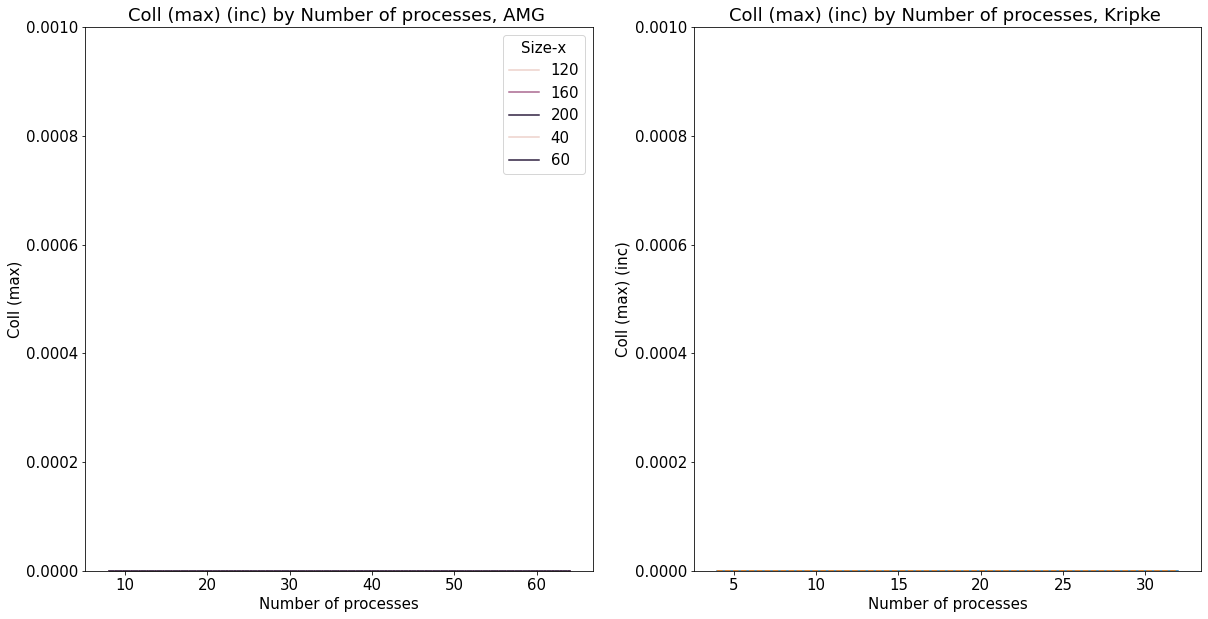

<Figure size 432x288 with 0 Axes>

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

#sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
#sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")

sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Coll (max)', hue="global_x")
sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[0], y='Coll (max)', hue="Size-x", linestyle="--")
sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Coll (max)')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Coll (max)', linestyle="--")

ax[0].set(ylim=(0, 0.001))
ax[1].set(ylim=(0, 0.001))
ax[0].set_title('Coll (max) (inc) by Number of processes, AMG ')
ax[1].set_title('Coll (max) (inc) by Number of processes, Kripke ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Coll (max) (inc)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Coll (max) (inc) AMG_Kripke.svg")

# Plot for Dst ranks (max)

/tmp/ipykernel_3545092/546132545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3545092/546132545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


<Figure size 1440x720 with 0 Axes>

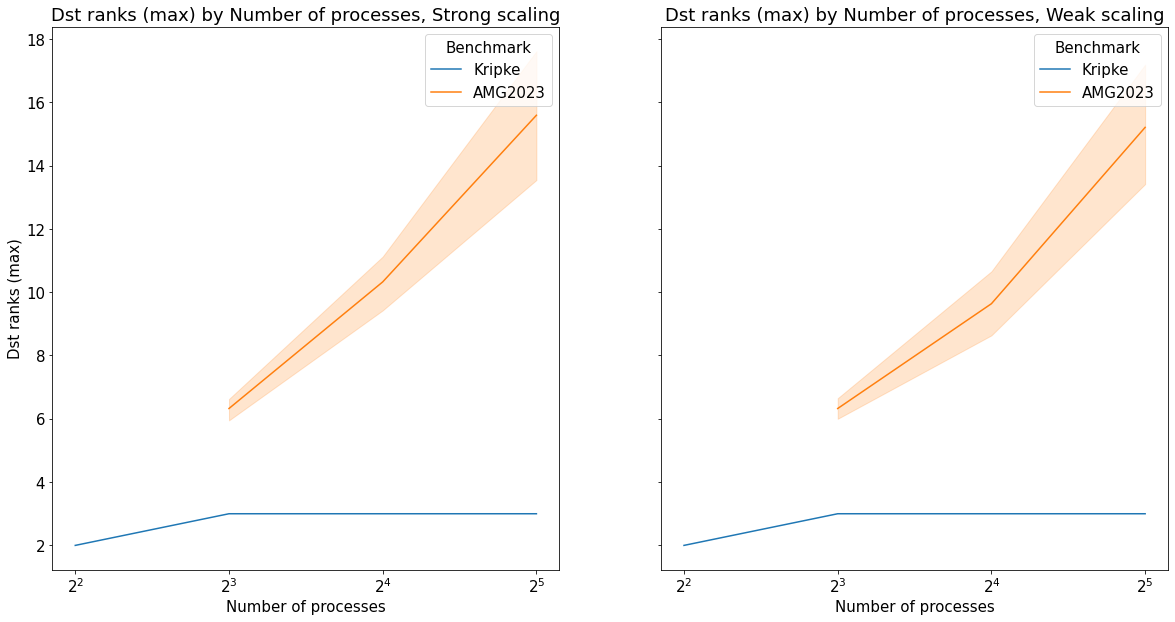

<Figure size 432x288 with 0 Axes>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0], y='Dst ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1], y='Dst ranks (max)', hue="Benchmark")


ax[0].set_title('Dst ranks (max) by Number of processes, Strong scaling')
ax[1].set_title('Dst ranks (max) by Number of processes, Weak scaling')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Dst ranks (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Dst ranks AMG_Kripke.svg")

In [119]:
# print(df_amg["Bytes sent (max)"])

# AMG2023 PROBLEM 2

# Avg time per loop

/tmp/ipykernel_3888681/2796400989.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/2796400989.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)


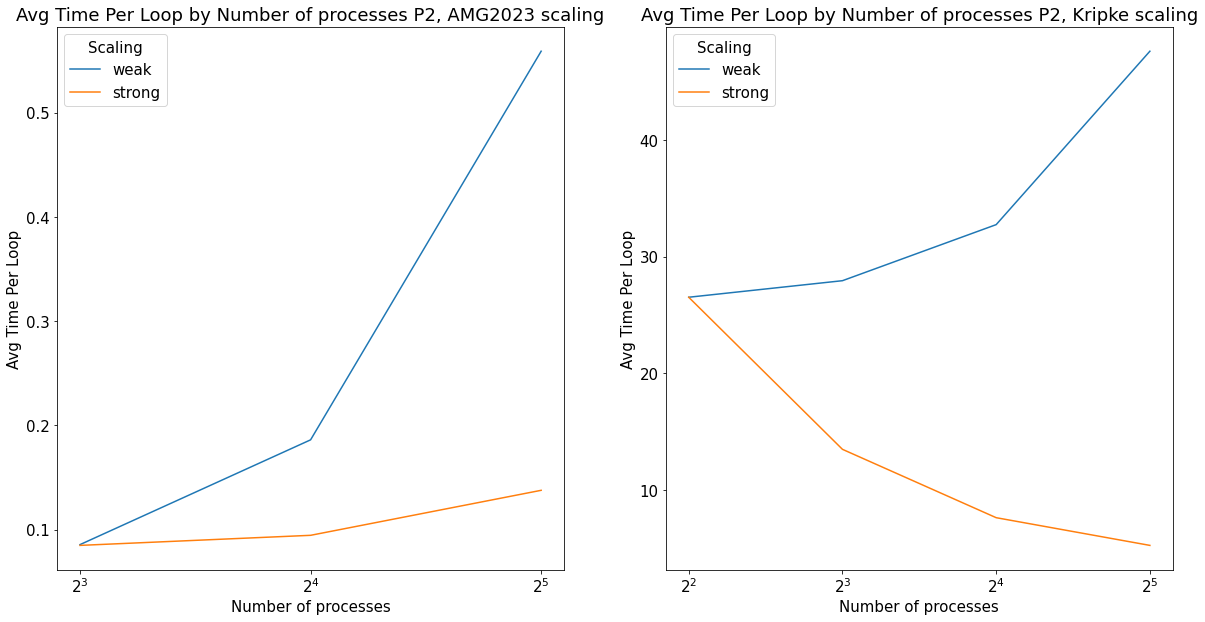

<Figure size 432x288 with 0 Axes>

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
sns.lineplot(data=df_amg, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="Scaling")
sns.lineplot(data=df_kripke, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Scaling")

ax[0].set_title('Avg Time Per Loop by Number of processes P2, AMG2023 scaling')
ax[1].set_title('Avg Time Per Loop by Number of processes P2, Kripke scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop_problem2.png")

# Src ranks

/tmp/ipykernel_3888681/301402833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/301402833.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


<Figure size 1440x720 with 0 Axes>

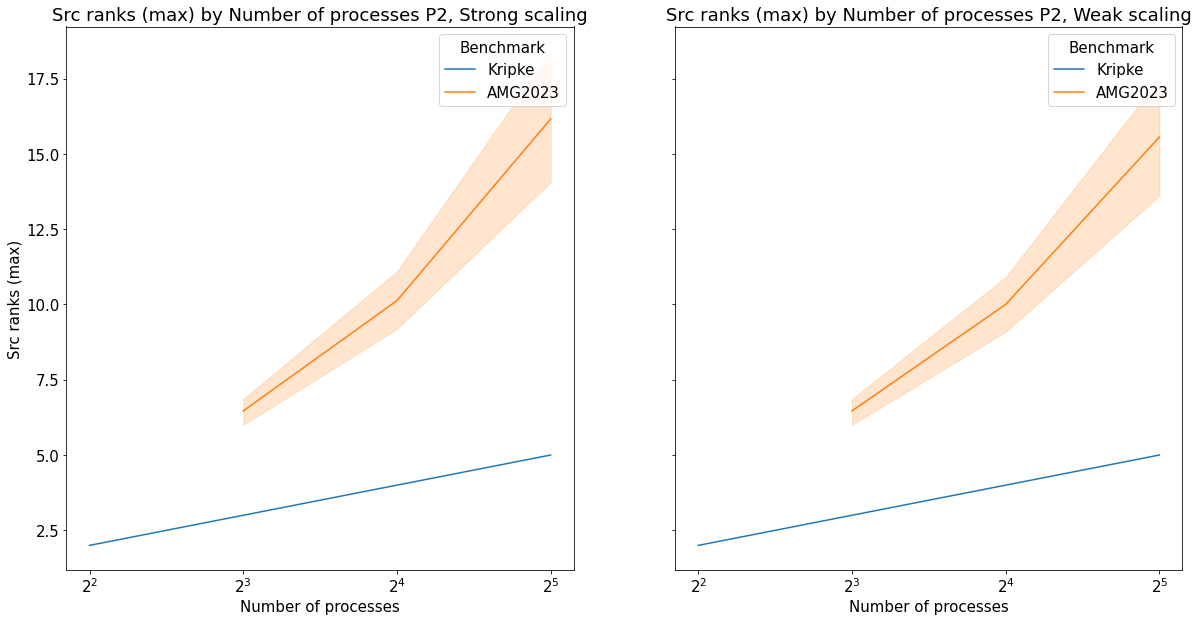

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', hue="Benchmark")


ax[0].set_title('Src ranks (max) by Number of processes P2, Strong scaling')
ax[1].set_title('Src ranks (max) by Number of processes P2, Weak scaling')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Src ranks (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Src ranks AMG_Kripke_P2.svg")

# Bytes sent max

/tmp/ipykernel_3888681/1299678053.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/1299678053.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)


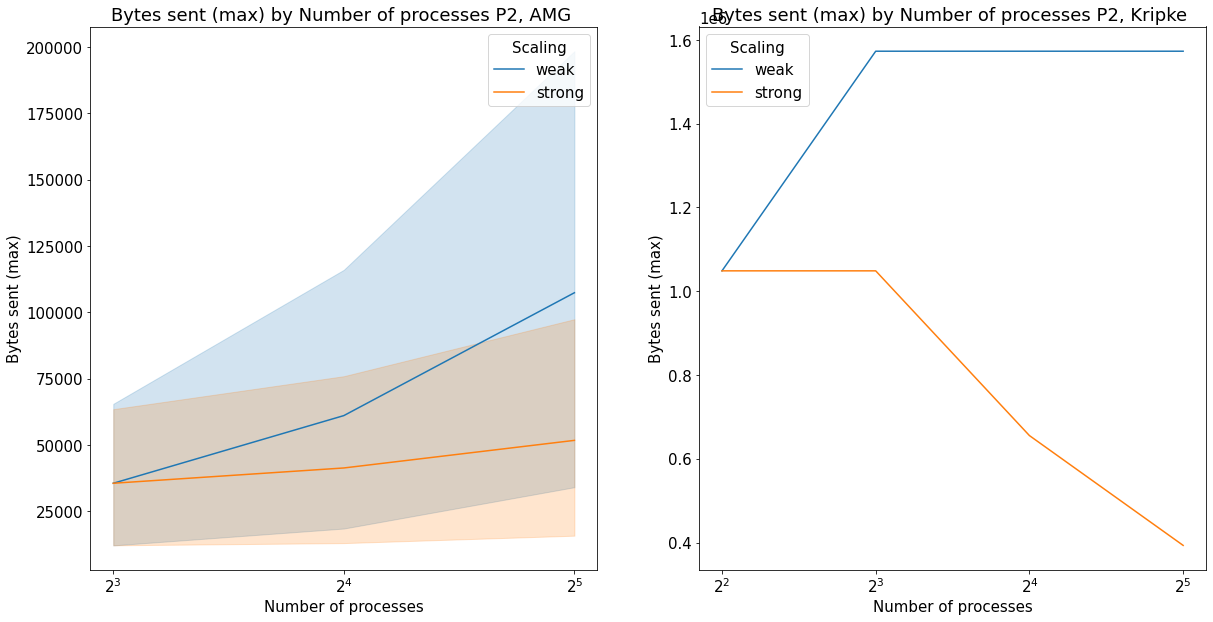

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")


ax[0].set_title('Bytes sent (max) by Number of processes P2, AMG ')
ax[1].set_title('Bytes sent (max) by Number of processes P2, Kripke ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Bytes sent (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Bytes sent (max) AMG_KripkeP2.svg")

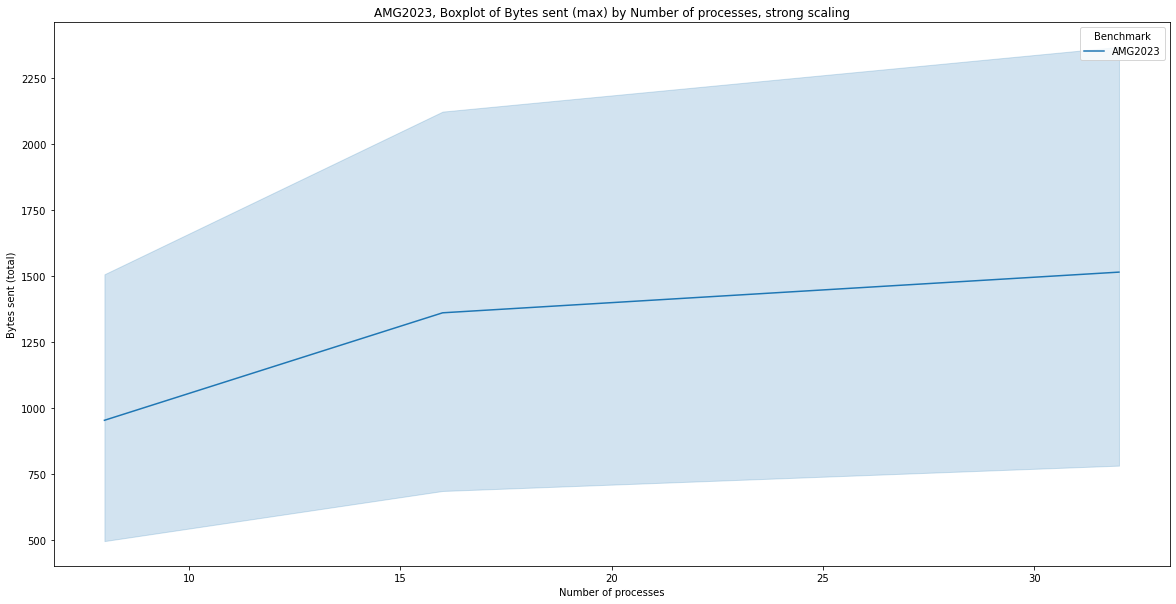

<Figure size 432x288 with 0 Axes>

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

#df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)

sns.lineplot(data=filtered_tk_amg_halo.dataframe, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('AMG2023, Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong.svg")

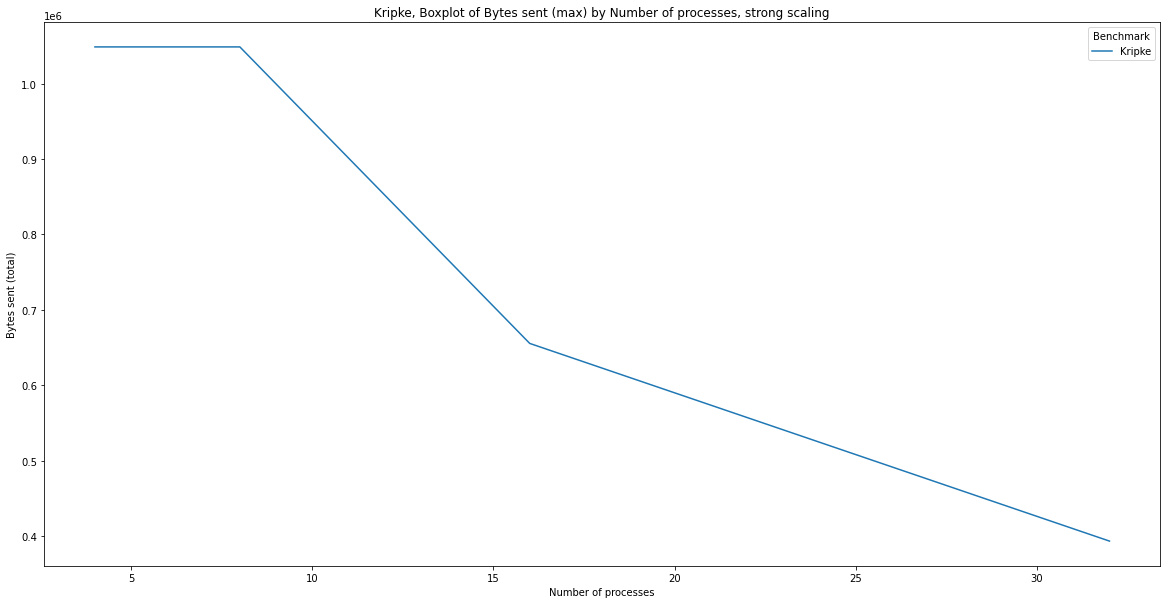

<Figure size 432x288 with 0 Axes>

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

#df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)

sns.lineplot(data=filtered_tk_kripke.dataframe, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('Kripke, Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong_kripke.svg")

# plot graphs for strong scaling 

/tmp/ipykernel_164869/2403794037.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


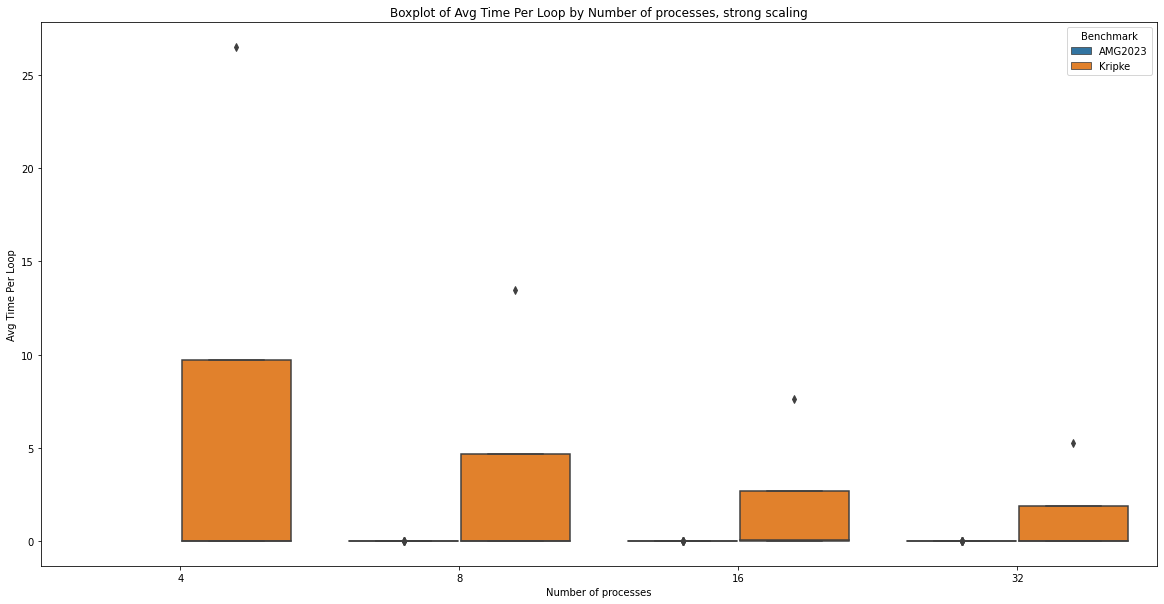

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='mpi.world.size', y='Avg Time Per Loop', hue="Benchmark")

plt.title('Boxplot of Avg Time Per Loop by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')

# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop_strong.svg")

/tmp/ipykernel_164869/1726889839.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


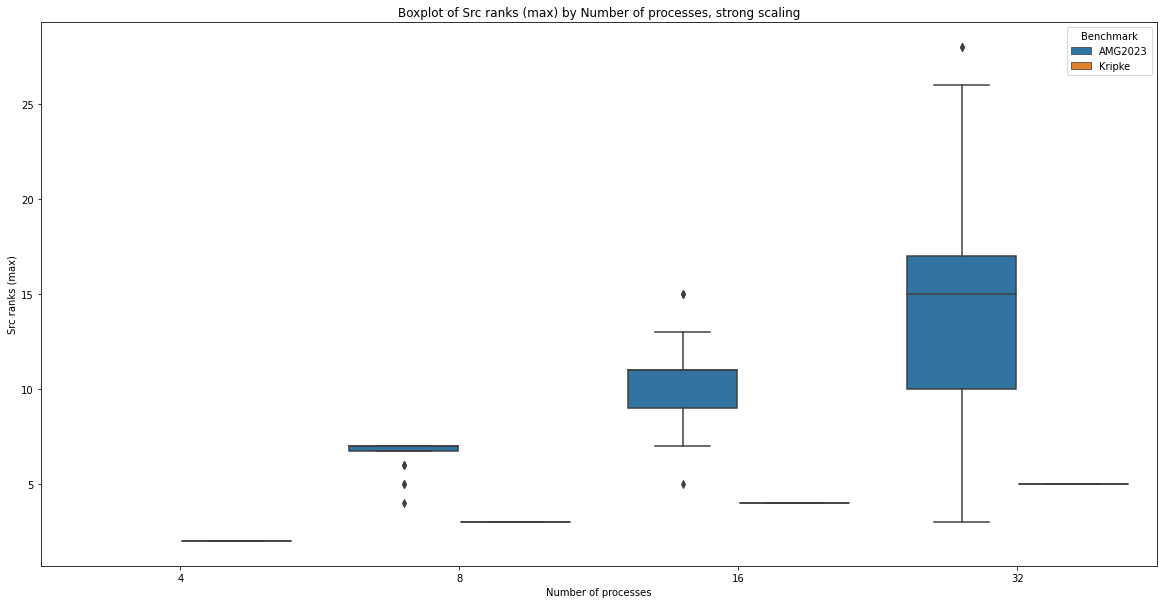

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
sns.boxplot(data=df, x='mpi.world.size', y='Src ranks (max)', hue="Benchmark")

plt.title('Boxplot of Src ranks (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Src ranks (max)')

# Display the plot
plt.show()
plt.savefig("Src ranks_strong.svg")

/tmp/ipykernel_164869/3525096349.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


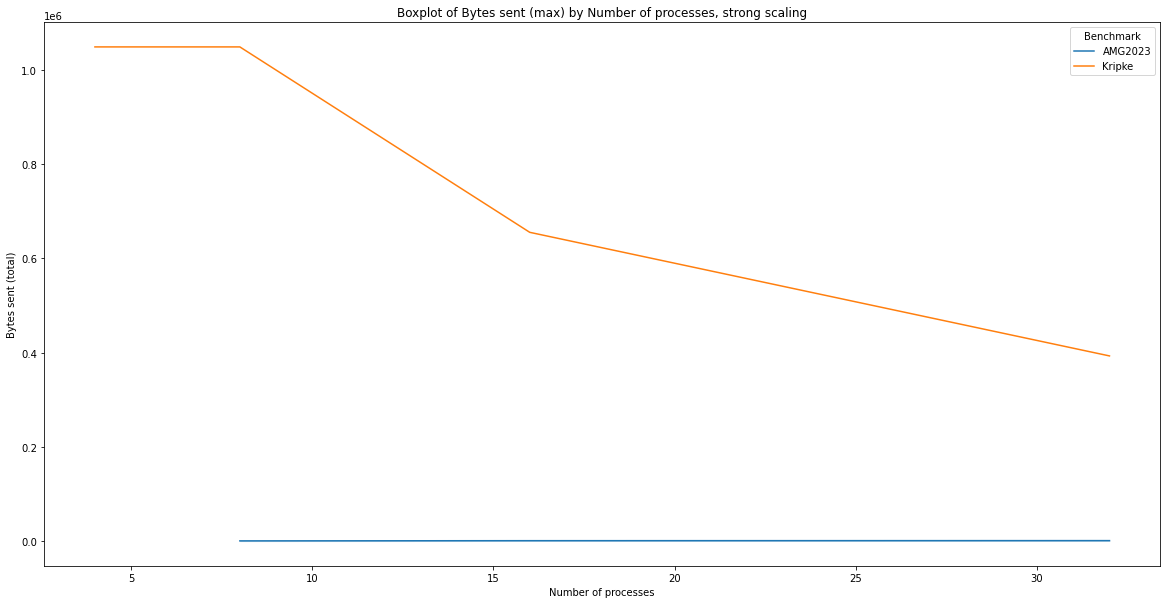

<Figure size 432x288 with 0 Axes>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
sns.lineplot(data=df, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong.svg")